# Importing Required Libraries & Datasets

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from IPython.display import Image

In [3]:
sns.set(rc={'figure.figsize':(15,5)})
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

# ==> 1. Data Sourcing <==

In [4]:
raw_data = pd.read_csv('loan.csv', index_col='id')

C:\Users\TOSHIBA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
original_csv_file_shape = raw_data.shape
original_csv_file_shape

(39717, 110)

# ==> 2. Data Cleaning (Part 1) <==

### 2.1 Finding Columns With All Null Values

In [6]:
more_than_50_percent = round(raw_data.isnull().sum()/len(raw_data)*100, 2)
more_than_50_percent.sort_values(ascending=False)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

##### We can safely drop the columns which have missing values more than 50%

In [7]:
raw_data = raw_data.drop(more_than_50_percent[more_than_50_percent > 50].index, axis=1)

##### Let's check the columns with most empty values again (Percentage Wise)

In [8]:
(raw_data.isnull().sum()/len(raw_data)*100).sort_values(ascending=False).head(20)

desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
int_rate                       0.000000
loan_amnt                      0.000000
purpose                        0.000000
funded_amnt                    0.000000
url                            0.000000
funded_amnt_inv                0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
issue_d                        0.000000
dtype: float64

### 2.2 From the above numbers, lets start analysing each column which has missing value.

#### 2.2.1 Describe: On carefully reading the describe column, we can infer that, values in that column are some what representing the same as that of purpose column. And since purpose column has no null value, we can go ahead by dropping desc column and keeping purpose column

In [9]:
raw_data = raw_data.drop(columns=['desc'])

#### 2.2.2 Employee Title: This column contains the information on job titles of people who have applied for loan, this could be usefull. We should not remove column, instead we can drop the missing values.

In [10]:
raw_data = raw_data[~raw_data.emp_title.isnull()]

#### 2.2.3 Employee Length: This column consists of information on professional experiance of employee and this could be useful parameter. We should not remove this column, instead we can drop the missing values.

In [11]:
raw_data = raw_data[~raw_data.emp_length.isnull()]

#### 2.2.4 Public Record Bankruptcies: This column consists of data related to bankruptcy. Though small, it can be decisive factor, hence dropping the missing rows.

In [12]:
raw_data = raw_data[~raw_data.pub_rec_bankruptcies.isnull()]

#### 2.2.5 Last Month Payment Done: Dropping the rows with missing values, as missing value percentage is negligible

In [13]:
raw_data = raw_data[~raw_data.last_pymnt_d.isnull()]

#### 2.2.6 Revolving Line Utilization Rate: Dropping the rows with missing values, as missing value percentage is negligible

In [14]:
raw_data = raw_data[~raw_data.revol_util.isnull()]

#### 2.2.7 Loan Title: Dropping the rows with missing values, as missing value percentage is negligible. Also, it is kind of an additional comments for which the loan is required, which is again very much covered under 'purpose' column

In [15]:
raw_data = raw_data[~raw_data.title.isnull()]

#### 2.2.8 Recent Month LC pulled: Dropping the rows with missing values, as missing value percentage is negligible

In [16]:
raw_data = raw_data[~raw_data.last_credit_pull_d.isnull()]

#### 2.2.9 Other Columns

In [17]:
raw_data.tax_liens.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [18]:
raw_data.chargeoff_within_12_mths.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [19]:
raw_data.collections_12_mths_ex_med.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

##### This columns have all the values as zero so this columns are of no use. So, lets remove this columns.

In [20]:
raw_data = raw_data.drop(columns=['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1)

### 2.4 Payment Plan Column consists of only one value i.e. 'n', so we can drop the same

In [21]:
raw_data = raw_data.drop(columns=['pymnt_plan'])

### 2.5 Initial List Status Column consists of only one value i.e. 'f', so we can drop the same

In [22]:
raw_data = raw_data.drop(columns=['initial_list_status'])

### 2.6 Policy Code Column consists of only one value i.e. 1, so we can drop the same

In [23]:
raw_data = raw_data.drop(columns=['policy_code'])

### 2.7 Application Type consists of only one value i.e. 'INDIVIDUAL', so we can drop the same

In [24]:
raw_data = raw_data.drop(columns=['application_type'])

### 2.8 The number of accounts on which the borrower is now delinquent & past-due amount owed column consists of only one value, so we can drop the same

In [25]:
raw_data = raw_data.drop(columns=['acc_now_delinq','delinq_amnt'])

### 2.9 Analysing Dataframe after dropping Rows & Columns

In [26]:
cleaned_data_shape = raw_data.shape
cleaned_data_shape

(36433, 43)

In [27]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-cleaned_data_shape[0]/original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 8.27 %


In [28]:
print('Percentage of Columns removed for entire Raw CSV File accounts to', round((1-cleaned_data_shape[1]/original_csv_file_shape[1])*100, 2), '%')

Percentage of Columns removed for entire Raw CSV File accounts to 60.91 %


# ==> 2. Data Cleaning (Part 2)<==

### This step involves formatting data and converting them into respective formats and creating new categorical columns (if required) which can be easily considered for quick calculations.

In [29]:
def extract_valid_float_from_cell(row):
    row = re.sub('[%, ]', '', str(row))
    return round(float(row), 2)

### 2.10 Creating New Column of Funding Category on the basis of 'Funding Amount'

In [30]:
# raw_data['funded_amount_category'] = raw_data['funded_amnt'].apply(lambda x: math.ceil(x/1000.00) * 1000)

In [31]:
funded_amount_range = [*range(0, raw_data['funded_amnt'].max() + 5000, 5000)]
raw_data['funded_amount_category'] = pd.cut(raw_data['funded_amnt'], funded_amount_range)

In [32]:
raw_data['funded_amount_category'].isnull().sum()

0

In [33]:
raw_data['funded_amount_category'].value_counts(sort=False)

(0, 5000]          8597
(5000, 10000]     12082
(10000, 15000]     7665
(15000, 20000]     4291
(20000, 25000]     2491
(25000, 30000]      680
(30000, 35000]      627
Name: funded_amount_category, dtype: int64

### 2.11 Formatting Loan Term Column

In [34]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [35]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

In [36]:
raw_data['term'].value_counts(sort=False)

36    26377
60    10056
Name: term, dtype: int64

### 2.12 Formatting Interest Rate Column to Float Value & Generating Categorical Column

In [37]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_cell)

In [38]:
# raw_data['int_rate_category'] = raw_data['int_rate'].apply(lambda x: math.ceil(x))

In [39]:
int_rate_range = [*range(math.floor(raw_data['int_rate'].min()), math.ceil(raw_data['int_rate'].max() + 1.0), 1)]
raw_data['int_rate_category'] = pd.cut(raw_data['int_rate'], int_rate_range)

In [40]:
raw_data['int_rate_category'].value_counts(sort=False)

(5, 6]      1215
(6, 7]      2269
(7, 8]      4019
(8, 9]      1421
(9, 10]     2246
(10, 11]    3724
(11, 12]    4072
(12, 13]    3165
(13, 14]    3755
(14, 15]    2545
(15, 16]    2498
(16, 17]    1820
(17, 18]    1332
(18, 19]     859
(19, 20]     670
(20, 21]     460
(21, 22]     189
(22, 23]     129
(23, 24]      41
(24, 25]       4
Name: int_rate_category, dtype: int64

### 2.13 Formatting Installment Column

In [41]:
raw_data['installment'].dtype

dtype('float64')

##### No need to format Insallment Column as it is already in correct format (float value)

### 2.14 Creating newly mapped Grade Column

In [42]:
grade_list = list(raw_data['grade'].unique())
grade_list.sort()

In [43]:
grade_dict_mapped = {value:index for index, value in enumerate(grade_list)}
grade_dict_mapped

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [44]:
raw_data['grade_mapped'] = raw_data['grade'].map(grade_dict_mapped)

In [45]:
raw_data['grade_mapped'].value_counts(sort=False)

0     9175
1    11035
2     7431
3     4875
4     2650
5      969
6      298
Name: grade_mapped, dtype: int64

### 2.15 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column. (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)

In [46]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with creating a new column which have only the number present in sub-grade column

In [47]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [48]:
raw_data['sub_grade_only_number'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

In [49]:
raw_data['sub_grade'].value_counts(sort=False)

E5     376
F3     170
E2     606
C5    1082
G1      98
C3    1406
C1    1949
F5     103
D5     801
A3    1630
F1     315
C4    1124
B1    1643
B3    2674
A5    2511
G4      56
G5      25
D4     905
B4    2319
D2    1245
A2    1356
C2    1870
F2     230
A4    2673
D3    1078
A1    1005
E1     729
B5    2529
G2      75
B2    1870
D1     846
E4     423
F4     151
E3     516
G3      44
Name: sub_grade, dtype: int64

### 2.16 Formatting Employee Title

In [50]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.lower().replace('.', ''))

In [51]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.replace('united states', 'us') if 'united states' in x else x)

In [52]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.replace('u s', 'us') if 'u s ' in x else x)

In [53]:
raw_data['emp_title'] = raw_data['emp_title'].replace("jpmorgan chase", "jp morgan chase")
raw_data['emp_title'] = raw_data['emp_title'].replace("self", "self employed")
raw_data['emp_title'] = raw_data['emp_title'].replace("self-employed", "self employed")
raw_data['emp_title'] = raw_data['emp_title'].replace("wal-mart", "walmart")
raw_data['emp_title'] = raw_data['emp_title'].replace("wal mart", "walmart")
raw_data['emp_title'] = raw_data['emp_title'].replace("att", "at&t")

In [54]:
raw_data['emp_title'].value_counts()

us army                                                                           291
self employed                                                                     136
bank of america                                                                   136
us air force                                                                      115
walmart                                                                           113
us postal service                                                                 109
jp morgan chase                                                                    89
at&t                                                                               89
us navy                                                                            79
ibm                                                                                68
kaiser permanente                                                                  68
wells fargo                                           

### 2.17 Formatting Employee Length (Years of Experience) Column

In [55]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [56]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

In [57]:
raw_data['emp_length'].value_counts(sort=False)

0.0     4052
1.0     3026
8.0     1405
4.0     3297
2.0     4178
9.0     1207
10.0    8407
3.0     3914
5.0     3129
6.0     2121
7.0     1697
Name: emp_length, dtype: int64

### 2.18 Formatting Ownership Column (Creating new mapped column)

In [58]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [59]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

In [60]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

In [61]:
raw_data['home_ownership'].value_counts(sort=False)

MORTGAGE    16300
RENT        17464
OWN          2575
OTHER          94
Name: home_ownership, dtype: int64

### 2.19 Formatting Annual Income / Salary Column (Creating new mapped column)

In [62]:
raw_data['annual_inc'].dtype

dtype('float64')

##### No need to format Annual Income Column as it is already in correct format (float value)

In [63]:
# raw_data['annual_inc_category'] = raw_data['annual_inc'].apply(lambda x: math.ceil(x/50000.00) * 50000)

In [64]:
raw_data.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

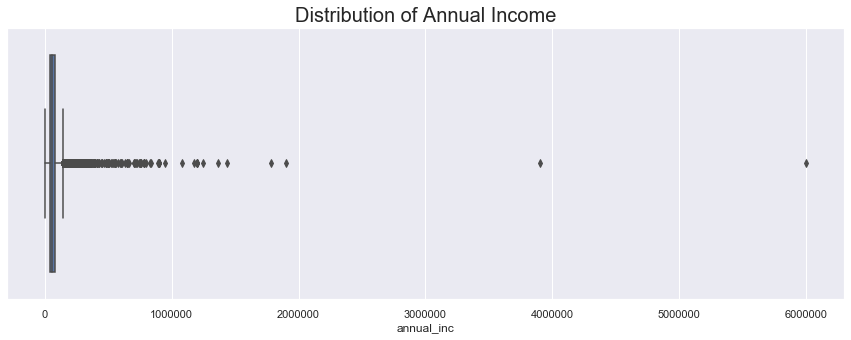

In [65]:
sns.boxplot(x=raw_data['annual_inc'], data=raw_data)
plt.title('Distribution of Annual Income', fontdict={'fontsize': 20})
plt.show()

##### We see that there are few outliers which are disturbing our observations. So we decide to cut out the outliers by taking value upto a quantile range of 98%

In [66]:
raw_data = raw_data[raw_data.annual_inc < raw_data['annual_inc'].quantile(0.98)]

In [67]:
raw_data.annual_inc.describe()

count     35704.000000
mean      64542.435351
std       31765.296321
min        4000.000000
25%       41000.000000
50%       58900.000000
75%       80000.000000
max      182952.000000
Name: annual_inc, dtype: float64

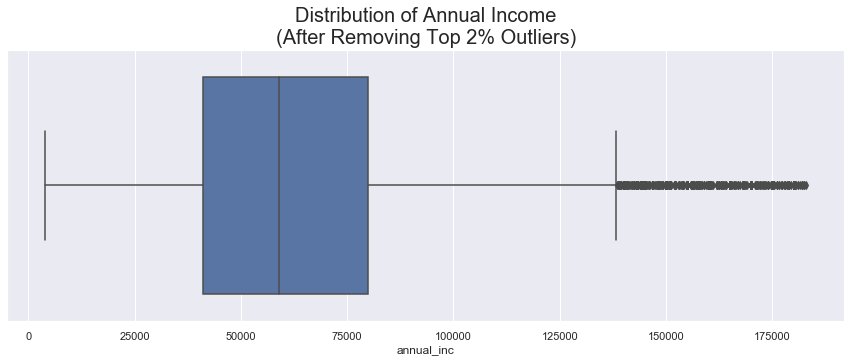

In [68]:
sns.boxplot(x=raw_data['annual_inc'], data=raw_data)
plt.title('Distribution of Annual Income\n(After Removing Top 2% Outliers)', fontdict={'fontsize': 20})
plt.show()

In [69]:
annual_inc_range = [*range(0, int(raw_data['annual_inc'].max()) + 10000, 10000)]
raw_data['annual_inc_category'] = pd.cut(raw_data['annual_inc'], annual_inc_range)

In [70]:
raw_data['annual_inc_category'].value_counts(sort=False)

(0, 10000]            54
(10000, 20000]       829
(20000, 30000]      2994
(30000, 40000]      4768
(40000, 50000]      5394
(50000, 60000]      5376
(60000, 70000]      3969
(70000, 80000]      3425
(80000, 90000]      2471
(90000, 100000]     1936
(100000, 110000]    1208
(110000, 120000]    1038
(120000, 130000]     707
(130000, 140000]     472
(140000, 150000]     420
(150000, 160000]     256
(160000, 170000]     164
(170000, 180000]     207
(180000, 190000]      16
Name: annual_inc_category, dtype: int64

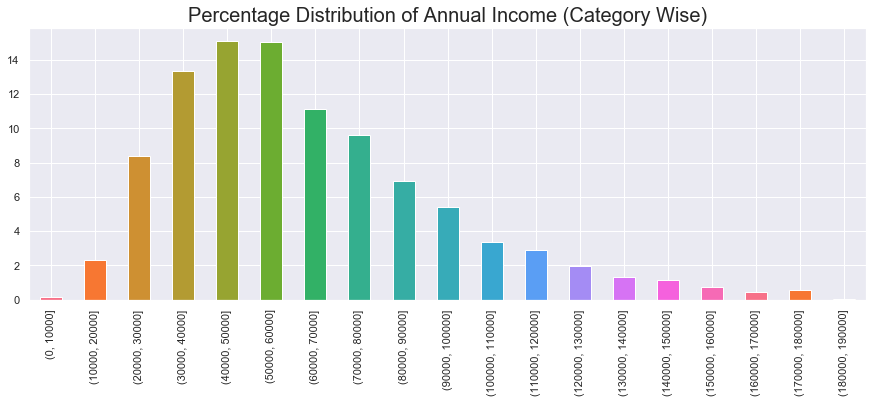

In [71]:
(raw_data.annual_inc_category.value_counts(normalize=True, sort=False)*100).plot.bar(color=sns.color_palette('husl', 16))
plt.title('Percentage Distribution of Annual Income (Category Wise)', fontdict={'fontsize': 20})
plt.show()

### 2.20 Formatting Salary Verification Column (Creating new mapped column)

In [72]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [73]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [74]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

In [75]:
raw_data['verification_status'].value_counts(sort=False)

Not Verified       14924
Source Verified     9230
Verified           11550
Name: verification_status, dtype: int64

### 2.21 Formatting Loan Issue Date to datetime object & Creating Seperate Column for Month & Year

In [76]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

In [77]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year

In [78]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month

### 2.22 Formatting Loan Status Column (Creating new mapped column) 

In [79]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [80]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

In [81]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

In [82]:
raw_data['loan_status'].value_counts(sort=False)

Fully Paid     29788
Charged Off     4874
Current         1042
Name: loan_status, dtype: int64

### 2.23 Formatting Purpose Column

In [83]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

In [84]:
raw_data['purpose'].value_counts(sort=False)

Wedding                 870
Medical                 616
Renewable Energy         83
House                   330
Other                  3502
Car                    1427
Moving                  519
Educational             271
Vacation                333
Home Improvement       2575
Credit Card            4643
Small Business         1370
Debt Consolidation    17201
Major Purchase         1964
Name: purpose, dtype: int64

### 2.24 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [85]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [86]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

In [87]:
raw_data['addr_state_name'].value_counts(sort=False)

Tennessee           10
New Jersey        1666
Pennsylvania      1397
North Carolina     692
South Dakota        57
Colorado           693
Alabama            410
Ohio              1125
Idaho                3
New York          3408
Georgia           1269
Massachusetts     1184
Illinois          1392
Nevada             453
Arizona            767
Utah               231
Florida           2567
Indiana              1
New Hampshire      148
Wisconsin          402
Iowa                 1
Michigan           650
Oklahoma           280
Arkansas           220
Hawaii             160
Mississippi         18
Rhode Island       184
Kentucky           305
Texas             2453
Virginia          1273
Kansas             245
Alaska              72
Washington         727
Connecticut        652
Oregon             411
New Mexico         162
Maryland           952
West Virginia      161
Nebraska             1
Louisiana          388
Wyoming             78
Montana             73
Vermont             48
California 

### 2.25 Creating DTI Category Column & Generating Categorical Column

In [88]:
raw_data['dti'].dtype

dtype('float64')

##### No need to format DTI Column as it is already in correct format (float value)

In [89]:
raw_data['dti'] = round(raw_data['dti'], 2)

In [90]:
# raw_data['dti_category'] = raw_data['dti'].apply(lambda x: math.ceil(x))

In [91]:
dti_range = [*range(math.floor(raw_data['dti'].min()), math.ceil(raw_data['dti'].max() + 1.0), 1)]
raw_data['dti_category'] = pd.cut(raw_data['dti'], dti_range)

In [92]:
raw_data['dti_category'].value_counts(sort=False)

(0, 1]       637
(1, 2]       751
(2, 3]       788
(3, 4]       903
(4, 5]      1097
(5, 6]      1186
(6, 7]      1257
(7, 8]      1448
(8, 9]      1551
(9, 10]     1624
(10, 11]    1739
(11, 12]    1707
(12, 13]    1804
(13, 14]    1878
(14, 15]    1860
(15, 16]    1787
(16, 17]    1738
(17, 18]    1621
(18, 19]    1597
(19, 20]    1604
(20, 21]    1489
(21, 22]    1334
(22, 23]    1355
(23, 24]    1161
(24, 25]    1024
(25, 26]     156
(26, 27]     151
(27, 28]     129
(28, 29]      97
(29, 30]      89
Name: dti_category, dtype: int64

### 2.26 Analysing Delinq 2 Years Column

In [93]:
raw_data['delinq_2yrs'].dtype

dtype('int64')

##### No need to format Delinq 2 Years Column as it is already in correct format (integer value)

### 2.27 Formatting Earliest Credit Line Column to Valid Date object

In [94]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [95]:
raw_data['earliest_cr_line_month'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).month

In [96]:
raw_data['earliest_cr_line_year'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).year

In [97]:
raw_data['earliest_cr_line_year'] = raw_data.earliest_cr_line_year.apply(lambda x: x-100 if (x > pd.datetime.now().year) else x)

C:\Users\TOSHIBA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


##### After converting year to proper format, we should drop 'earliest_cr_line' column to avoid data duplicacy issues.

In [98]:
raw_data = raw_data.drop(columns=['earliest_cr_line'])

In [99]:
raw_data['earliest_cr_line_month'].value_counts(sort=False)

1     3118
2     2560
3     2462
4     2473
5     2599
6     2618
7     2767
8     2984
9     3215
10    3698
11    3562
12    3648
Name: earliest_cr_line_month, dtype: int64

In [100]:
raw_data['earliest_cr_line_year'].value_counts(sort=False)

1984     336
1985     392
1954       1
1986     439
1987     536
1956       1
1988     640
1989     748
1990     906
1991     837
1992     946
1993    1353
1962       3
1994    1796
1963       4
1995    1924
1964       1
1996    2025
1965       5
1997    2230
1966       7
1998    2608
1967      11
1999    2734
1968      12
2000    2996
1969      21
2001    2347
1970      35
2002    1780
1971      31
2003    1734
1972      29
2004    1631
1973      40
2005    1403
1974      49
2006    1077
1975      56
2007     667
1976      68
2008     142
1977      87
1946       1
1978     124
1979     132
1980     146
1981     146
1950       1
1982     185
1983     281
Name: earliest_cr_line_year, dtype: int64

### 2.28 Formatting Inq 6 Months Column to Valid Date object

In [101]:
raw_data['inq_last_6mths'].dtype

dtype('int64')

##### No need to format Inq Last 6 Months Column as it is already in correct format (integer value)

### 2.29 Formatting Revolving Balance & Generating Categorical Column

In [102]:
raw_data['revol_bal'].dtype

dtype('int64')

##### No need to format Revolving Balance Column as it is in proper format

In [103]:
revol_bal_range = [*range(math.floor(raw_data['revol_bal'].min()), math.ceil(raw_data['revol_bal'].max() + 100.0), 2000)]
raw_data['revol_bal_category'] = pd.cut(raw_data['revol_bal'], revol_bal_range)

In [104]:
# raw_data['revol_bal_category'] = raw_data['revol_bal'].apply(lambda x: math.ceil(x/2000.00) * 2000)

In [105]:
raw_data['revol_bal_category'].value_counts()

(0, 2000]           4431
(2000, 4000]        4110
(4000, 6000]        3733
(6000, 8000]        3328
(8000, 10000]       2993
(10000, 12000]      2592
(12000, 14000]      2228
(14000, 16000]      1836
(16000, 18000]      1530
(18000, 20000]      1269
(20000, 22000]       973
(22000, 24000]       868
(24000, 26000]       708
(26000, 28000]       620
(28000, 30000]       486
(30000, 32000]       388
(32000, 34000]       331
(34000, 36000]       301
(38000, 40000]       224
(36000, 38000]       204
(40000, 42000]       161
(44000, 46000]       155
(42000, 44000]       154
(46000, 48000]       124
(52000, 54000]        90
(48000, 50000]        90
(54000, 56000]        80
(50000, 52000]        74
(56000, 58000]        66
(60000, 62000]        57
(58000, 60000]        50
(62000, 64000]        49
(64000, 66000]        42
(66000, 68000]        41
(70000, 72000]        38
(68000, 70000]        38
(72000, 74000]        34
(74000, 76000]        31
(78000, 80000]        30
(80000, 82000]        25


### 2.30 Formatting Revolving Utilization Rate & Generating Categorical Column

In [106]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_cell)

In [107]:
# raw_data['revol_util_category'] = raw_data['revol_util'].apply(lambda x: (math.ceil(x/10.00) * 10) if not np.isnan(x) else np.nan)

In [108]:
revol_util_range = [*range(math.floor(raw_data['revol_util'].min()), math.ceil(raw_data['revol_util'].max() + 10.0), 10)]
raw_data['revol_util_category'] = pd.cut(raw_data['revol_util'], revol_util_range)

In [109]:
raw_data['revol_util_category'].value_counts(sort=False)

(0, 10]      3060
(10, 20]     2997
(20, 30]     3432
(30, 40]     3715
(40, 50]     3924
(50, 60]     3942
(60, 70]     3919
(70, 80]     3669
(80, 90]     3387
(90, 100]    2837
Name: revol_util_category, dtype: int64

### 2.31 Categorizing Total Number of Credit Lines column

In [110]:
raw_data['total_acc'].dtype

dtype('int64')

##### No need to format Total Number of Credit Lines Column as it is in proper format

In [111]:
# raw_data['total_acc_category'] = raw_data['total_acc'].apply(lambda x: math.ceil(x/5.00) * 5)

In [112]:
total_acc_range = [*range(math.floor(raw_data['total_acc'].min()), math.ceil(raw_data['total_acc'].max() + 10.0), 10)]
raw_data['total_acc_category'] = pd.cut(raw_data['total_acc'], total_acc_range)

In [113]:
raw_data['total_acc_category'].value_counts(sort=False)

(2, 12]      7576
(12, 22]    12820
(22, 32]     9195
(32, 42]     4170
(42, 52]     1419
(52, 62]      420
(62, 72]       95
(72, 82]        6
(82, 92]        2
Name: total_acc_category, dtype: int64

### 2.32 Categorizing Remaining outstanding principal column

In [114]:
raw_data['out_prncp'].dtype

dtype('float64')

##### No need to format Remaining outstanding principal Column as it is in proper format

In [115]:
# raw_data['out_prncp_category'] = raw_data['out_prncp'].apply(lambda x: math.ceil(x/100.00) * 100)

In [116]:
out_prncp_range = [*range(math.floor(raw_data['out_prncp'].min()), math.ceil(raw_data['out_prncp'].max() + 100.0), 100)]
raw_data['out_prncp_category'] = pd.cut(raw_data['out_prncp'], out_prncp_range)

In [117]:
raw_data['out_prncp_category'].value_counts(sort=False)

(0, 100]        26
(100, 200]      31
(200, 300]      38
(300, 400]      32
(400, 500]      47
(500, 600]      48
(600, 700]      34
(700, 800]      44
(800, 900]      35
(900, 1000]     24
(1000, 1100]    41
(1100, 1200]    36
(1200, 1300]    32
(1300, 1400]    23
(1400, 1500]    21
(1500, 1600]    23
(1600, 1700]    27
(1700, 1800]    34
(1800, 1900]    34
(1900, 2000]    29
(2000, 2100]    20
(2100, 2200]    29
(2200, 2300]    26
(2300, 2400]    24
(2400, 2500]    18
(2500, 2600]    13
(2600, 2700]    18
(2700, 2800]    13
(2800, 2900]    15
(2900, 3000]    18
(3000, 3100]    10
(3100, 3200]    16
(3200, 3300]    17
(3300, 3400]    15
(3400, 3500]    10
(3500, 3600]    10
(3600, 3700]     9
(3700, 3800]    10
(3800, 3900]     7
(3900, 4000]     7
(4000, 4100]    10
(4100, 4200]     6
(4200, 4300]     3
(4300, 4400]     4
(4400, 4500]     7
(4500, 4600]     5
(4600, 4700]     4
(4700, 4800]     4
(4800, 4900]     4
(4900, 5000]     1
(5000, 5100]     1
(5100, 5200]     0
(5200, 5300]

### 2.33 Categorizing Outstanding Principal for Portion of Total Amount Funded by Investors Column

In [118]:
raw_data['out_prncp_inv'].dtype

dtype('float64')

##### No need to format Outstanding Principal for Portion of Total Amount Funded by Investors Column as it is in proper format

In [119]:
# raw_data['out_prncp_inv_category'] = raw_data['out_prncp_inv'].apply(lambda x: math.ceil(x/100.00) * 100)

In [120]:
out_prncp_inv_range = [*range(math.floor(raw_data['out_prncp_inv'].min()), math.ceil(raw_data['out_prncp_inv'].max() + 100.0), 100)]
raw_data['out_prncp_inv_category'] = pd.cut(raw_data['out_prncp_inv'], out_prncp_inv_range)

In [121]:
raw_data['out_prncp_inv_category'].value_counts(sort=False)

(0, 100]        26
(100, 200]      31
(200, 300]      39
(300, 400]      34
(400, 500]      45
(500, 600]      48
(600, 700]      35
(700, 800]      46
(800, 900]      35
(900, 1000]     23
(1000, 1100]    42
(1100, 1200]    34
(1200, 1300]    34
(1300, 1400]    21
(1400, 1500]    22
(1500, 1600]    24
(1600, 1700]    26
(1700, 1800]    35
(1800, 1900]    32
(1900, 2000]    30
(2000, 2100]    18
(2100, 2200]    35
(2200, 2300]    21
(2300, 2400]    22
(2400, 2500]    18
(2500, 2600]    16
(2600, 2700]    17
(2700, 2800]    11
(2800, 2900]    17
(2900, 3000]    17
(3000, 3100]    10
(3100, 3200]    16
(3200, 3300]    16
(3300, 3400]    16
(3400, 3500]     9
(3500, 3600]    12
(3600, 3700]     8
(3700, 3800]    13
(3800, 3900]     5
(3900, 4000]     5
(4000, 4100]    11
(4100, 4200]     5
(4200, 4300]     3
(4300, 4400]     4
(4400, 4500]     8
(4500, 4600]     5
(4600, 4700]     3
(4700, 4800]     5
(4800, 4900]     3
(4900, 5000]     1
(5000, 5100]     1
(5100, 5200]     2
(5200, 5300]

### 2.34 Analysing Following Columns (if they are needed to format)

In [122]:
raw_data.total_pymnt.dtype

dtype('float64')

In [123]:
raw_data.total_pymnt_inv.dtype

dtype('float64')

In [124]:
raw_data.total_rec_prncp.dtype

dtype('float64')

In [125]:
raw_data.total_rec_int.dtype

dtype('float64')

In [126]:
raw_data.total_rec_late_fee.dtype

dtype('float64')

In [127]:
raw_data.recoveries.dtype

dtype('float64')

In [128]:
raw_data.collection_recovery_fee.dtype

dtype('float64')

**Observation**
- All the above listed columns seems to be in right format, hence no need of any conversion.

### 2.35 Formatting Last Payment & Last Credit Pull Date Column to Valid format

In [129]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [130]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

**Apart from that, we also see that following variables even though are valid, but these factors will not be present when a candidate os applying for loan. Hence, we can drop this following columns:**
- Payments received to date for total amount funded (total_pymnt)
- Payments received to date for portion of total amount funded by investors (total_pymnt_inv)
- Principal received to date (total_rec_prncp)
- Interest received to date (total_rec_int)
- Late fees received to date (total_rec_late_fee)
- Post charge off gross recovery (recoveries)
- Post charge off collection fee (collection_recovery_fee)
- Last month payment was received (last_pymnt_d)
- Last total payment amount received (last_pymnt_amnt)
- Most recent month LC pulled credit for this loan (last_credit_pull_d)

In [131]:
raw_data = raw_data.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                          'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
                         axis=1)

### 2.36 Creating New Column As Percentage of Open Credit Lines Compared With Available Credit Lines

In [132]:
raw_data['ratio_of_credit_line'] = raw_data['open_acc'] / raw_data['total_acc'] * 100

In [133]:
raw_data['ratio_of_credit_line_category'] = raw_data['ratio_of_credit_line'].apply(lambda x: math.ceil(x/5.00) * 5)

### 2.37 Categorising Public Record Column

In [134]:
raw_data['pub_rec'].dtype

dtype('int64')

##### No need to format Public Record Column as it is in proper format

In [135]:
raw_data['pub_rec'].value_counts(sort=False)

0    33833
1     1817
2       46
3        6
4        2
Name: pub_rec, dtype: int64

### 2.38 Categorising Open Credit Line Column

In [136]:
raw_data['open_acc'].dtype

dtype('int64')

##### No need to format Open Credit Column as it is in proper format

In [137]:
raw_data['open_acc'].value_counts(sort=False)

32       3
33       3
2      482
34       5
3     1300
35       1
4     2067
36       2
5     2851
6     3568
38       1
7     3637
39       1
8     3559
9     3390
10    2909
11    2485
12    2067
44       1
13    1709
14    1350
15    1066
16     841
17     661
18     486
19     356
20     260
21     224
22     129
23      83
24      65
25      51
26      23
27      19
28      22
29      10
30      12
31       5
Name: open_acc, dtype: int64

### 2.39 Categorising Public Record Bankruptcy Column

In [138]:
raw_data['pub_rec_bankruptcies'].dtype

dtype('float64')

In [139]:
raw_data['pub_rec_bankruptcies'] = raw_data['pub_rec_bankruptcies'].apply(lambda x: int(x))

In [140]:
raw_data['pub_rec_bankruptcies'].value_counts(sort=False)

0    34214
1     1483
2        7
Name: pub_rec_bankruptcies, dtype: int64

# ==> 3. Univariate, Segmented & Bivariate Analysis <==

#### For Univariate, Segmented & Bivariate analysis, we will assume only the data relevant to loan status of Fully Paid & Charged Off.
#### Since, we want to compare number of defaulters against the one who have successfully paid, we are dropping the rows relevant to loan status of 'Current'
#### By this way, we will have only 2 types of customers. One which have fully paid & others which are defaulted which will ease out the visualisation of Defaulters against the one who have fully paid.
### Moving ahead, we will focus only on the data relevant to Fully Paid & Charged Off ONLY.

In [141]:
raw_data = raw_data[raw_data['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [142]:
raw_data.shape

(34662, 53)

In [143]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-raw_data.shape[0] / original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 12.73 %


In [144]:
##--
raw_data.head()
# to get glimpse of attributes we are dealing with.

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
id                                                                            
1077430    1314167       2500         2500           2500.0    60     15.27   
1076863    1277178      10000        10000          10000.0    36     13.49   
1075269    1311441       5000         5000           5000.0    36      7.90   
1069639    1304742       7000         7000           7000.0    60     15.96   
1072053    1288686       3000         3000           3000.0    36     18.64   

         installment grade sub_grade                  emp_title  emp_length  \
id                                                                            
1077430        59.83     C        C4                      ryder         0.0   
1076863       339.31     C        C1        air resources board        10.0   
1075269       156.46     A        A4       veolia transportaton         3.0   
1069639       170.08     C        C5  southern star photography         8.0   
1072053       109.43     E        E1            mkc accounting          9.0   

        home_ownership  annual_inc verification_status    issue_d  \
id                                                                  
1077430           RENT     30000.0     Source Verified 2011-12-01   
1076863           RENT     49200.0     Source Verified 2011-12-01   
1075269           RENT     36000.0     Source Verified 2011-12-01   
1069639           RENT     47004.0        Not Verified 2011-12-01   
1072053           RENT     48000.0     Source Verified 2011-12-01   

         loan_status                                                url  \
id                                                                        
1077430  Charged Off  https://lendingclub.com/browse/loanDetail.acti...   
1076863   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1075269   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1069639   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1072053   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   

                    purpose                                  title zip_code  \
id                                                                            
1077430                 Car                                   bike    309xx   
1076863               Other                               personel    917xx   
1075269             Wedding  My wedding loan I promise to pay back    852xx   
1069639  Debt Consolidation                                   Loan    280xx   
1072053                 Car                        Car Downpayment    900xx   

        addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
id                                                                          
1077430         GA   1.00            0               5         3        0   
1076863         CA  20.00            0               1        10        0   
1075269         AZ  11.20            0               3         9        0   
1069639         NC  23.51            0               1         7        0   
1072053         CA   5.35            0               2         4        0   

         revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
id                                                                    
1077430       1687         9.4          4        0.0            0.0   
1076863       5598        21.0         37        0.0            0.0   
1075269       7963        28.3         12        0.0            0.0   
1069639      17726        85.6         11        0.0            0.0   
1072053       8221        87.5          4        0.0            0.0   

         pub_rec_bankruptcies funded_amount_category int_rate_category  \
id                                                                       
1077430                     0              (0, 5000]          (15, 16]   
1076863                     0          (5000, 10000]          (13, 14]   
107

### 3.1 Analysis of "funded_amount" column

In [145]:
##--
raw_data.funded_amnt.describe()
# To get basic undderstanding of variable and its distribution.

count    34662.000000
mean     10716.264209
std       6937.927700
min        500.000000
25%       5375.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [146]:
##--
raw_data.funded_amnt.value_counts(normalize=True)*100

10000    7.091339
12000    5.770008
5000     5.167042
6000     4.956436
15000    4.489066
8000     4.085165
20000    3.513935
4000     2.893659
7000     2.631123
25000    2.590733
3000     2.553228
16000    1.863712
9000     1.751197
14000    1.549247
18000    1.407882
2000     1.327102
7500     1.280942
4800     1.104956
35000    1.104956
13000    1.021291
2500     1.009751
24000    0.926086
7200     0.917431
9600     0.914546
3500     0.862616
11000    0.796261
4500     0.764526
1500     0.752986
3600     0.744331
30000    0.744331
1000     0.695286
6500     0.686631
5500     0.675091
2400     0.646241
8500     0.623161
5600     0.591426
4200     0.582771
8400     0.574116
14400    0.565461
17000    0.551036
6400     0.530841
21000    0.501991
3200     0.452946
22000    0.389476
11200    0.380820
1200     0.337545
2800     0.328890
12500    0.300040
14500    0.297155
10800    0.279845
9500     0.279845
28000    0.276960
12800    0.271190
11500    0.268305
1800     0.265420
19000    0

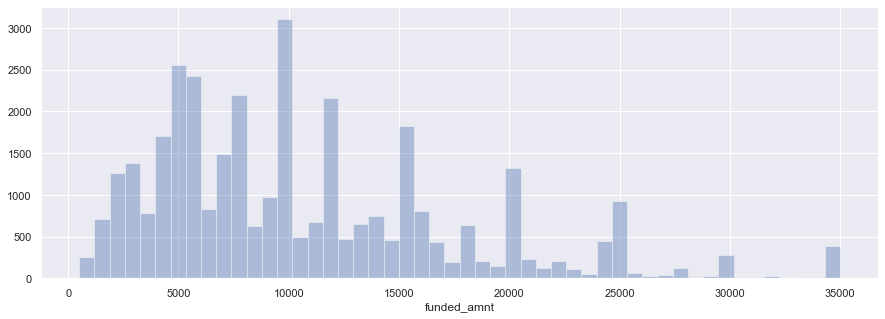

In [147]:
##--
ax = sns.distplot(raw_data['funded_amnt'],kde=False)
# Necessary to understand visual aid and get sence of distribution.

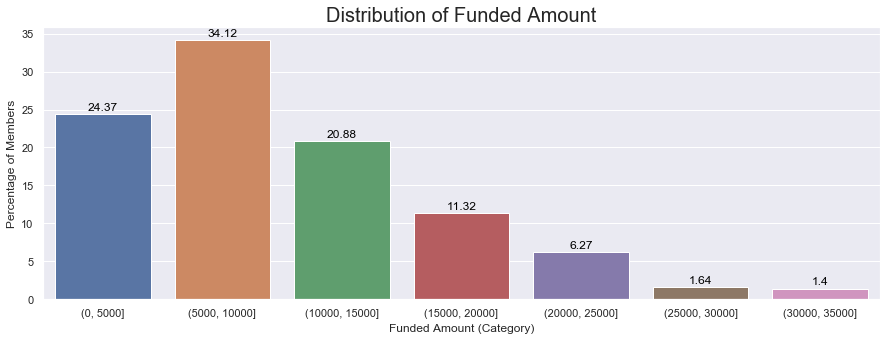

In [148]:
funded_amnt_dist = raw_data.funded_amount_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=funded_amnt_dist.index, y=funded_amnt_dist.values)
plt.title('Distribution of Funded Amount', fontdict={'fontsize': 20})
label_deviation_above_y_axis = funded_amnt_dist.max() * 0.015
for index, value in enumerate(funded_amnt_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Funded Amount (Category)")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- Variable is contineous variable, ranging from 500 to 35000.
- As seen in above univariate analysis mmean of the data is around ~10K, around 7% of applicantions are for 10K loan, is maximum in distribution.
- Distribution is maximum in the range of 5K to 10K


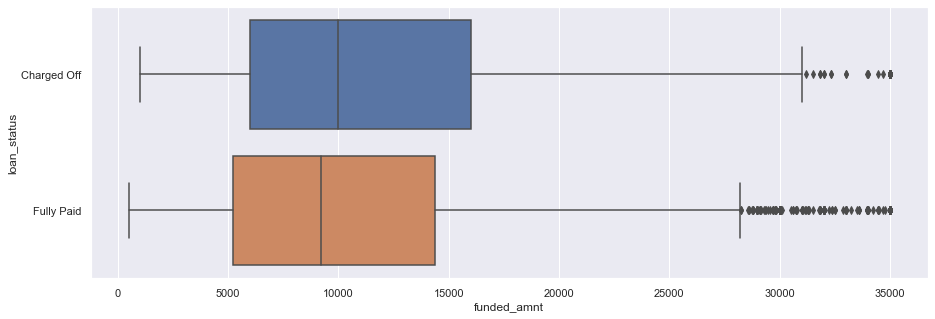

In [149]:
sns.boxplot(x=raw_data['funded_amnt'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [150]:
raw_data.groupby('loan_status')['funded_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4874.0  11804.872794  7649.547537  1000.0  6000.0  10000.0   
Fully Paid   29788.0  10538.142876  6797.983701   500.0  5200.0   9200.0   

                 75%      max  
loan_status                    
Charged Off  16000.0  35000.0  
Fully Paid   14400.0  35000.0

##--
**Observation:**
 - Overall applied loan loan is right skewed with mean greater than median
 - From Box plot is is clear that mean of Fully Paid members is around ~10000
 - However, for Charged Off members we can see higher upper limit (i.e. 75 percentile).
 - Charged Off loans are shifted towrdas higher mean as compared to Fully Paid.
 - Majority of the amount funded lies below 20K

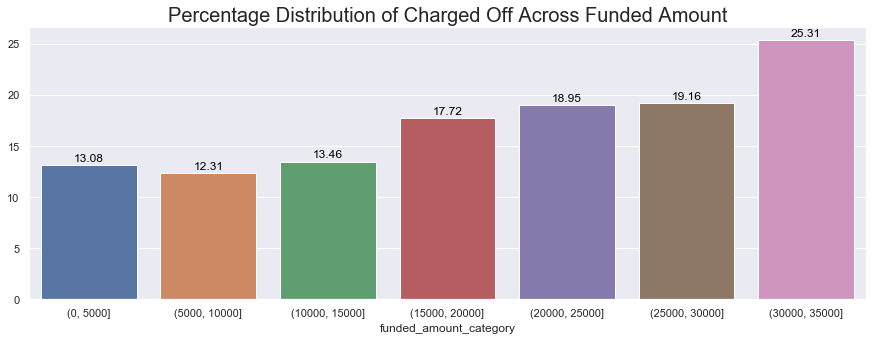

In [151]:
funded_amount_df = raw_data.pivot_table(index='funded_amount_category', columns='loan_status', values='member_id', aggfunc='count')
funded_amount_df['total'] = funded_amount_df.sum(axis=1)
funded_amount_df = funded_amount_df.iloc[:,:-1].div(funded_amount_df["total"], axis=0)*100
chart = sns.barplot(x = funded_amount_df['Charged Off'].index, y=funded_amount_df['Charged Off'].values)
label_deviation_above_y_axis = funded_amount_df['Charged Off'].max() * 0.015
for index, value in enumerate(funded_amount_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Funded Amount", fontdict={'fontsize': 20})
plt.show()
# funded_amount_df

**From the above visualisation for related to charged off only members, we can infer that:**
- As the funding amount increases, number of defaulters (charged off) also increases.

##### To verify this, we'll calculate the Correlation Co-efficient to proove this behaviour mathematically.

In [152]:
##--
correlation_x_index_list = [*range(1, funded_amount_df.shape[0]+1, 1)] 
funded_amount_df['correlation_x_index'] =correlation_x_index_list
funded_amount_df

loan_status             Charged Off  Fully Paid  correlation_x_index
funded_amount_category                                              
(0, 5000]                 13.080019   86.919981                    1
(5000, 10000]             12.312896   87.687104                    2
(10000, 15000]            13.458615   86.541385                    3
(15000, 20000]            17.716034   82.283966                    4
(20000, 25000]            18.951242   81.048758                    5
(25000, 30000]            19.156415   80.843585                    6
(30000, 35000]            25.308642   74.691358                    7

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


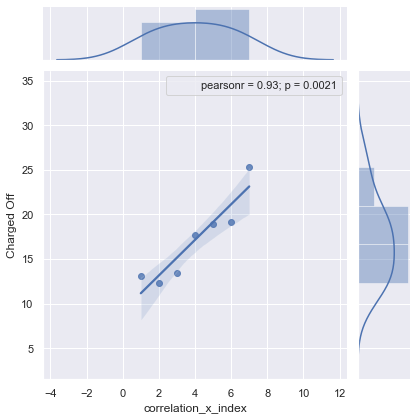

In [153]:
##--
funded_amount_df_plot = sns.jointplot('correlation_x_index', 'Charged Off', funded_amount_df,kind="reg")
funded_amount_df_plot.annotate(stats.pearsonr)
plt.show()
##confrimed with excel calculations 0.9341

In [155]:
headers = ['Funding Amount', 'Charged Off']
pd.DataFrame(np.corrcoef(funded_amount_df['correlation_x_index'], funded_amount_df["Charged Off"]), index=headers, columns=headers)

Funding Amount  Charged Off
Funding Amount         1.00000      0.93411
Charged Off            0.93411      1.00000

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between funded amount bin and percentage charged off increase in bin.

### 3.2 Analysis of Term column

In [156]:
##--
raw_data.term.describe()
# To get basic undderstanding of variable and its distribution.

count    34662.000000
mean        42.075125
std         10.435469
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

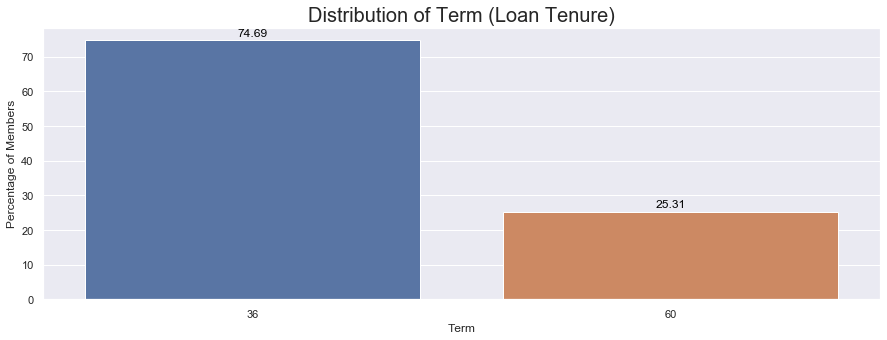

In [157]:
term_dist = raw_data.term.value_counts(normalize=True, sort=False)*100
#plt.figure(figsize=(5,8))
graph_1 = sns.barplot(x=term_dist.index, y=term_dist.values)
plt.title('Distribution of Term (Loan Tenure)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = term_dist.max() * 0.015
for index, value in enumerate(term_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Term")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- Variable is categorical ordered variable, with categories 36 and 60 term length.
- From bar graph it is understood that 74% applications are from 36 term and 25% applications are from 60 term.

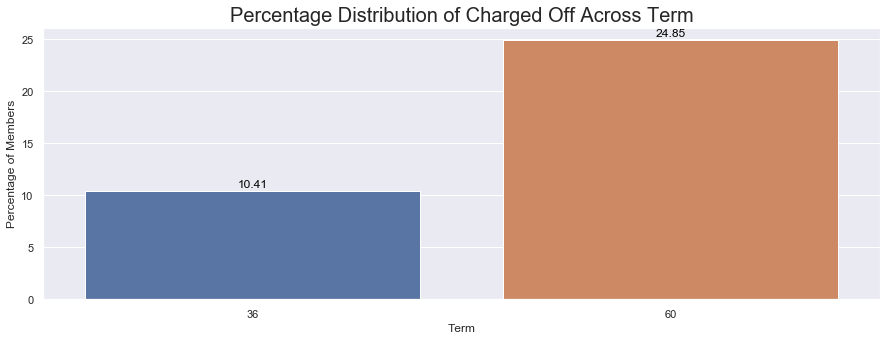

In [158]:
term_df = raw_data.pivot_table(index='term', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
term_df['total'] = term_df.sum(axis=1)
term_df = term_df.iloc[:,:-1].div(term_df["total"], axis=0)*100
chart = sns.barplot(x = term_df['Charged Off'].index, y=term_df['Charged Off'].values)
label_deviation_above_y_axis = term_df['Charged Off'].max() * 0.015
for index, value in enumerate(term_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Term", fontdict={'fontsize': 20})
plt.xlabel("Term")
plt.ylabel("Percentage of Members")
plt.show()
# term_df

##--
**Observation**
- From percentage distribution in terms for charged off category, we can observe that 24% applicant defaulted in 60 term category and comparatively only 10% are defaulted in 36 term category.
- It can be clearly infered that with 60 month term chances of default increases considerably.

In [159]:
term_df_x_index_list = [*range(1, term_df.shape[0]+1, 1)] 
term_df['term_dfcorrelation_x_index'] =term_df_x_index_list
term_df

loan_status  Charged Off  Fully Paid  term_dfcorrelation_x_index
term                                                            
36             10.406366   89.593634                           1
60             24.846136   75.153864                           2

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


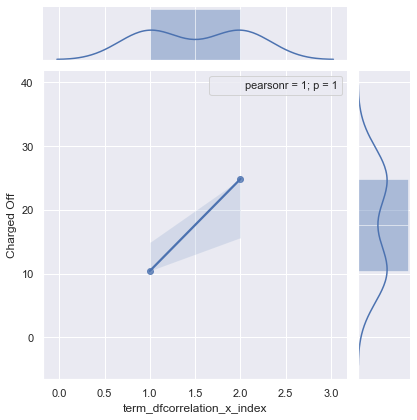

In [160]:
##--
term_df_plot = sns.jointplot('term_dfcorrelation_x_index', 'Charged Off', term_df,kind="reg")
term_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observations**
- As only two points are available, treand line shows a coefficient as 1, as single line pass through two points.
- Only sign of trend should be considered and not the value, as only two points are available. 

### 3.3 Analysis of "Interest Rate" column

In [161]:
##--
raw_data.int_rate.describe()
# To get basic understanding of variable and its distribution.

count    34662.000000
mean        11.958255
std          3.690370
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [162]:
##--
raw_data.int_rate.value_counts(normalize=True)*100

10.99    2.437828
7.51     2.094513
11.49    2.082973
13.49    2.016618
7.88     1.912757
7.49     1.731002
9.99     1.566557
7.90     1.503087
11.71    1.500202
5.42     1.442502
11.99    1.298252
10.37    1.217472
12.69    1.208817
8.49     1.159772
6.03     1.133806
5.79     1.090531
12.42    1.084761
10.65    1.070336
12.99    1.055911
7.29     1.041486
11.86    1.029946
6.62     1.015521
9.63     1.012636
8.90     0.986671
10.59    0.911661
9.91     0.905891
14.27    0.900121
7.14     0.900121
11.11    0.888581
6.99     0.885696
5.99     0.885696
12.53    0.868386
6.54     0.845306
10.74    0.839536
13.61    0.802031
6.91     0.802031
16.77    0.793376
8.94     0.764526
7.66     0.752986
13.98    0.747216
13.23    0.715481
15.99    0.683746
11.12    0.672206
10.00    0.669321
12.68    0.666436
10.36    0.666436
10.75    0.660666
11.36    0.657781
6.17     0.652011
13.99    0.631816
10.38    0.594311
10.62    0.585656
13.06    0.579886
10.25    0.579886
16.49    0.577001
11.83    0

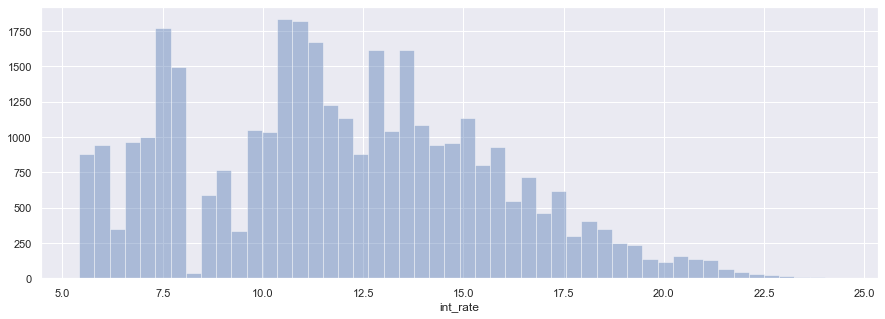

In [163]:
##--
ax = sns.distplot(raw_data['int_rate'],kde=False)
# Necessary to understand visual aid and get sense of distribution.

##--
**Observation**
- Interest rate contineous variable, ranging from 5.42 to 24.4%.
- Mean and Median for the data is close, points are well distributed about mean.

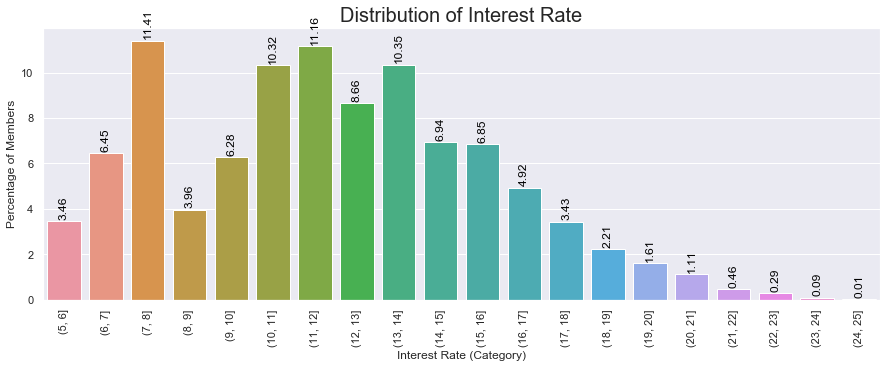

In [164]:
int_rate_dist = raw_data.int_rate_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=int_rate_dist.index, y=int_rate_dist.values)
plt.title('Distribution of Interest Rate', fontdict={'fontsize': 20})
label_deviation_above_y_axis = int_rate_dist.max() * 0.015
for index, value in enumerate(int_rate_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Interest Rate (Category)")
plt.ylabel("Percentage of Members")
plt.show()

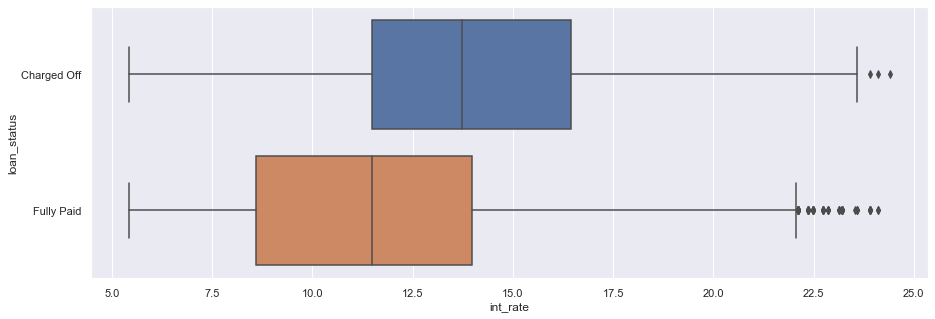

In [165]:
sns.boxplot(x=raw_data['int_rate'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [166]:
raw_data.groupby(['loan_status'])['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4874.0  13.903816  3.637104  5.42  11.48  13.72  16.45  24.40
Fully Paid   29788.0  11.639917  3.600337  5.42   8.59  11.49  13.99  24.11

**Observation**
- We can see that, distribution of interest rate is higher for Charged Off members as compared to Fully Paid members
- Reason might be that, bank wants to recover their amount from interest as quickly as possible, hence they have charged high interest rate on risky applicants

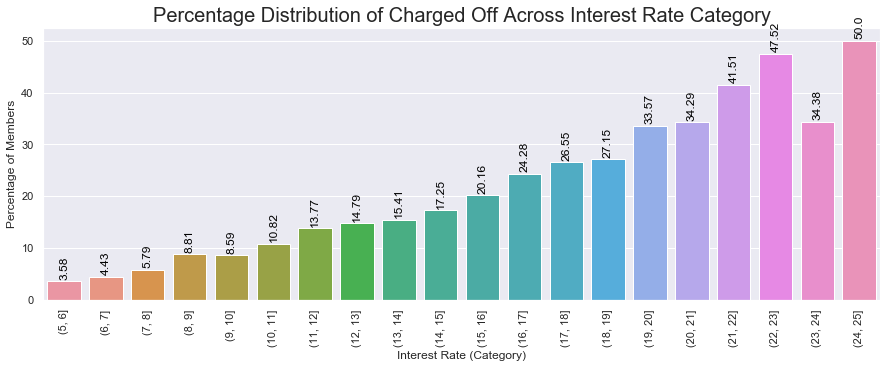

In [167]:
interest_rate_df = raw_data.pivot_table(index='int_rate_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
interest_rate_df['total'] = interest_rate_df.sum(axis=1)
interest_rate_df = interest_rate_df.iloc[:,:-1].div(interest_rate_df["total"], axis=0)*100
chart = sns.barplot(x = interest_rate_df['Charged Off'].index, y=interest_rate_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Interest Rate Category", fontdict={'fontsize': 20})
label_deviation_above_y_axis = interest_rate_df['Charged Off'].max() * 0.015
for index, value in enumerate(interest_rate_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Interest Rate (Category)")
plt.ylabel("Percentage of Members")
plt.show()
# interest_rate_df

**Inference**
- We see that, as the Interest increases, proportion of members getting default also increases.

##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [168]:
interest_rate_df_x_index_list = [*range(1, interest_rate_df.shape[0]+1, 1)] 
interest_rate_df['interest_rate_dfcorrelation_x_index'] =interest_rate_df_x_index_list
interest_rate_df

loan_status        Charged Off  Fully Paid  \
int_rate_category                            
(5, 6]                3.583333   96.416667   
(6, 7]                4.425570   95.574430   
(7, 8]                5.791603   94.208397   
(8, 9]                8.806405   91.193595   
(9, 10]               8.589802   91.410198   
(10, 11]             10.819122   89.180878   
(11, 12]             13.772610   86.227390   
(12, 13]             14.785215   85.214785   
(13, 14]             15.408192   84.591808   
(14, 15]             17.248545   82.751455   
(15, 16]             20.159933   79.840067   
(16, 17]             24.281525   75.718475   
(17, 18]             26.554622   73.445378   
(18, 19]             27.154047   72.845953   
(19, 20]             33.572711   66.427289   
(20, 21]             34.285714   65.714286   
(21, 22]             41.509434   58.490566   
(22, 23]             47.524752   52.475248   
(23, 24]             34.375000   65.625000   
(24, 25]             50.000000   50.000000   

loan_status        interest_rate_dfcorrelation_x_index  
int_rate_category                                       
(5, 6]                                               1  
(6, 7]                                               2  
(7, 8]                                               3  
(8, 9]                                               4  
(9, 10]                                              5  
(10, 11]                                             6  
(11, 12]                                             7  
(12, 13]                                             8  
(13, 14]                                             9  
(14, 15]                                            10  
(15, 16]                                            11  
(16, 17]                                            12  
(17, 18]                                            13  
(18, 19]                                            14  
(19, 20]                                            15  
(20, 21]                                            16  
(21, 22]                                            17  
(22, 23]                                            18  
(23, 24]                                            19  
(24, 25]                                            20

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


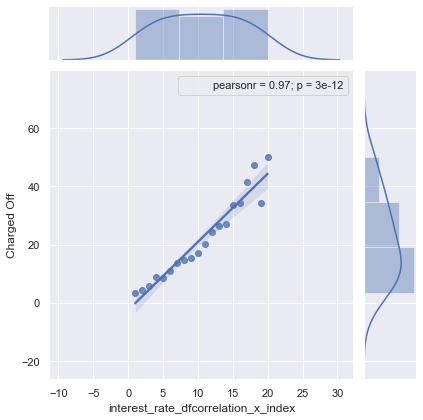

In [169]:
##--
interest_rate_df_plot = sns.jointplot('interest_rate_dfcorrelation_x_index', 'Charged Off', interest_rate_df,kind="reg")
interest_rate_df_plot.annotate(stats.pearsonr)
plt.show()

In [1]:
headers = ['Interest Rate', 'Charged Off']
pd.DataFrame(np.corrcoef(interest_rate_df['interest_rate_dfcorrelation_x_index'], interest_rate_df["Charged Off"]), index=headers, columns=headers)

NameError: name 'pd' is not defined

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between interest rate and percentage charged off increase in bin.

### 3.4 Analysis of "Grade" column.

In [170]:
##--
raw_data.grade.describe()
# To get basic understanding of variable and its distribution.

count     34662
unique        7
top           B
freq      10524
Name: grade, dtype: object

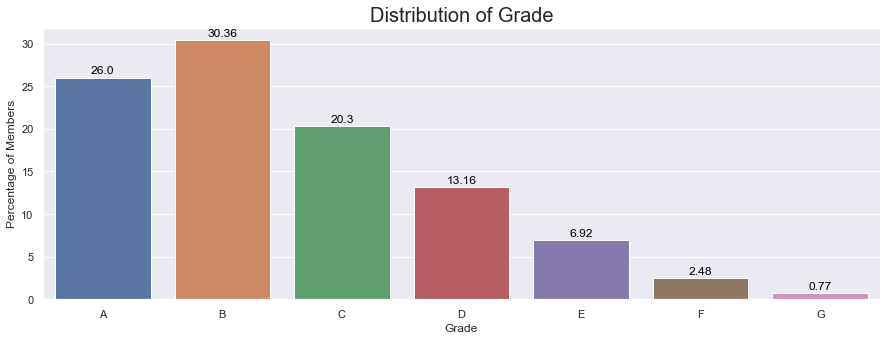

In [171]:
grade_dist = raw_data.groupby(by='grade').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=grade_dist.index, y=grade_dist.values)
plt.title('Distribution of Grade', fontdict={'fontsize': 20})
label_deviation_above_y_axis = grade_dist.max() * 0.015
for index, value in enumerate(grade_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Grade")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- Grade, ordered categorical variable, A,B,C,D,E,F,G.
- Maximum count is observed for B, i.e. 30.36%.

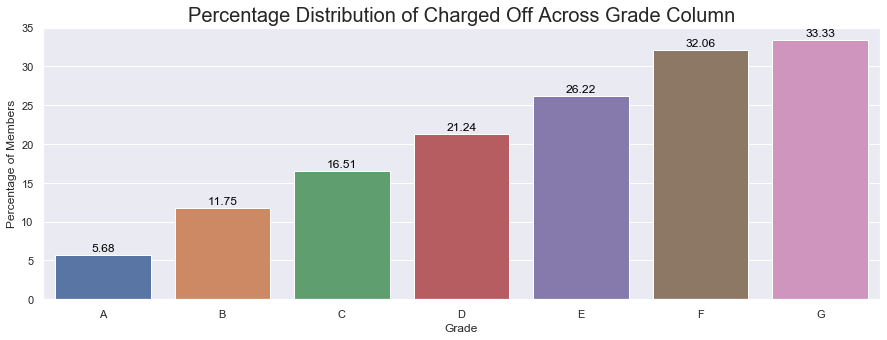

In [172]:
grade_df = raw_data.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
grade_df['total'] = grade_df.sum(axis=1)
grade_df = grade_df.iloc[:,:-1].div(grade_df["total"], axis=0)*100
chart = sns.barplot(x = grade_df['Charged Off'].index, y=grade_df['Charged Off'].values)
chart.set_xticklabels(grade_list, rotation=0)
label_deviation_above_y_axis = grade_df['Charged Off'].max() * 0.015
for index, value in enumerate(grade_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Grade Column", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Percentage of Members")
plt.show()
# grade_df

##--
**Observation**
- from available data it could be infred that category from A-G, refers to various levels of risk associated with applicantion.
- Assuming that the grade column has been implemented by the bank, to denote risky applicant, this model can be very much useful in identifying those applicants.
- We can also see that, all the applicants covered under Grade E, F & G are very much risky.

In [173]:
##--
grade_df_x_index_list = [*range(1, grade_df.shape[0]+1, 1)] 
grade_df['grade_dfcorrelation_x_index'] =grade_df_x_index_list
grade_df

loan_status  Charged Off  Fully Paid  grade_dfcorrelation_x_index
grade                                                            
A               5.681314   94.318686                            1
B              11.754086   88.245914                            2
C              16.512718   83.487282                            3
D              21.240684   78.759316                            4
E              26.219258   73.780742                            5
F              32.055749   67.944251                            6
G              33.333333   66.666667                            7

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


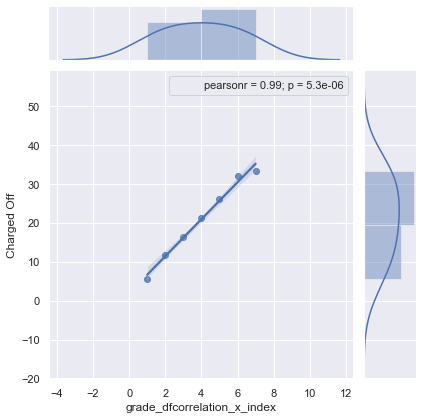

In [174]:
##--
grade_df_plot = sns.jointplot('grade_dfcorrelation_x_index', 'Charged Off', grade_df,kind="reg")
grade_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between grade and percentage charged off increase in bin.

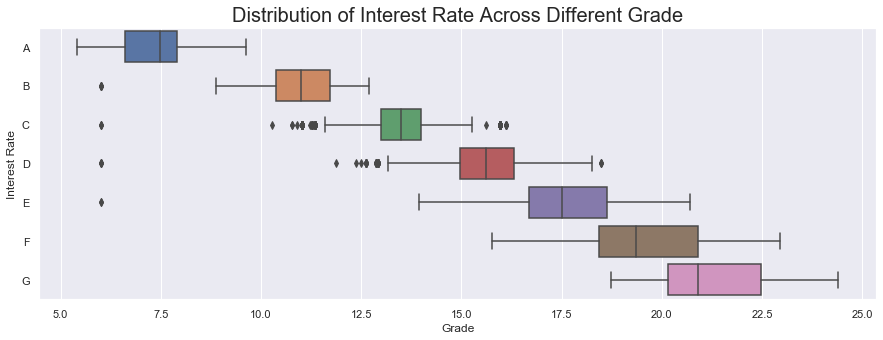

In [175]:
sns.boxplot(raw_data.int_rate, raw_data['grade'], order=['A','B','C','D','E','F','G'])
plt.title("Distribution of Interest Rate Across Different Grade", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

**Observation**
- When Grade Column is plotted against Interest Rate, we can observe this behavior wherein majority charged off applicants (which are in Grade G) are levied with higher interest rate to recover the principal amount.

### 3.5 Analysis of "Sub-Grade (Only Numbers)" column

In [179]:
sub_grade_only_number_dist = raw_data.groupby(by='sub_grade_only_number').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=sub_grade_only_number_dist.index, y=sub_grade_only_number_dist.values)
plt.title('Distribution of Sub-Grade', fontdict={'fontsize': 20})
label_deviation_above_y_axis = sub_grade_only_number_dist.max() * 0.015
for index, value in enumerate(sub_grade_only_number_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()
##--
Do not agree to this as 4 means A4,B4,C4,D4. which is not right.

SyntaxError: invalid syntax (<ipython-input-179-63d4db4149c6>, line 12)

In [ ]:
sub_grade_num_df = raw_data.pivot_table(index='sub_grade_only_number', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_num_df['total'] = sub_grade_num_df.sum(axis=1)
sub_grade_num_df = sub_grade_num_df.iloc[:,:-1].div(sub_grade_num_df["total"], axis=0)*100
chart = sns.barplot(x = sub_grade_num_df['Charged Off'].index, y=sub_grade_num_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
label_deviation_above_y_axis = sub_grade_num_df['Charged Off'].max() * 0.015
for index, value in enumerate(sub_grade_num_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Sub-Grade (Only Number)", fontdict={'fontsize': 20})
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()
# sub_grade_num_df
##--
Do not agree to this as 4 means A4,B4,C4,D4. which is not right.

**Observations**
- On comparing the entire data consisting of both Fully Paid & Charged Off, we see that as the Sub-Grade number increases, percentage also increases although slightly.
- But, when taking into considertion the 'Charged Off' data only, we dont see any considerable change or a pattern. So, we can neglect making use of Sub-Grade Numbers Only

### 3.6 Analysis of "Sub-Grade" columns

In [180]:
##--
raw_data.sub_grade.describe()
# To get basic understanding of variable and its distribution.

count     34662
unique       35
top          A4
freq       2626
Name: sub_grade, dtype: object

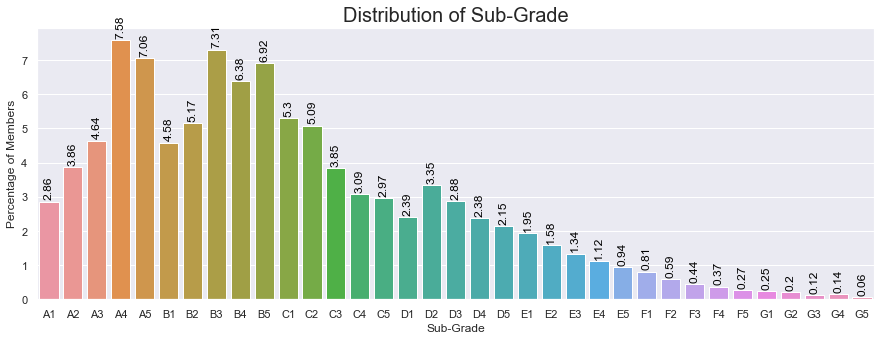

In [181]:
sub_grade_dist = raw_data.groupby(by='sub_grade').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=sub_grade_dist.index, y=sub_grade_dist.values)
plt.title('Distribution of Sub-Grade', fontdict={'fontsize': 20})
label_deviation_above_y_axis = sub_grade_dist.max() * 0.015
for index, value in enumerate(sub_grade_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- sub_grade, categorical ordinal variable, A1,A2,....G4,G5. 
- From above graph it is clear that almost 7% applications are categorised as A4, max count in the variable.

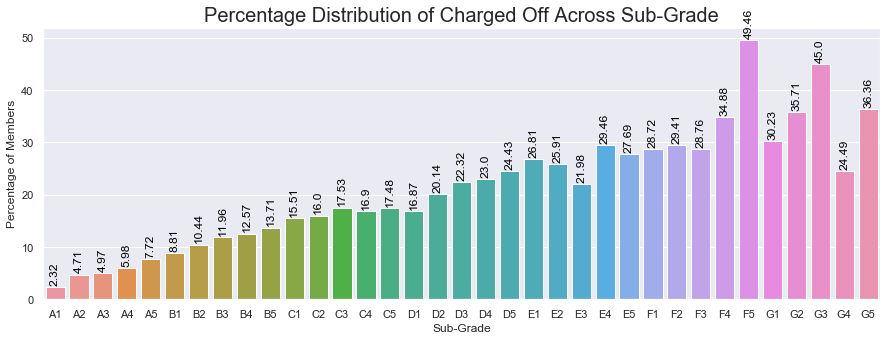

In [182]:
sub_grade_df = raw_data.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_df['total'] = sub_grade_df.sum(axis=1)
sub_grade_df = sub_grade_df.iloc[:,:-1].div(sub_grade_df["total"], axis=0)*100
chart = sns.barplot(x = sub_grade_df['Charged Off'].index, y=sub_grade_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = sub_grade_df['Charged Off'].max() * 0.015
for index, value in enumerate(sub_grade_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')

plt.title("Percentage Distribution of Charged Off Across Sub-Grade", fontdict={'fontsize': 20})
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()
# sub_grade_df

**Observations**
- On comparing the entire data consisting of both Fully Paid & Charged Off, we see that as the Sub-Grade moves from (A1-->A2-->A3-->) uptil (-->G3-->G4-->G5), percentage also decreases.
- But, when taking into considertion the 'Charged Off' data only, we see an increasing pattern.
- With this again, assuming that the sub-grade column has been implemented by the bank, to denote risky applicant, this model can be very much useful in identifying those risky applicants.

In [183]:
##--
sub_grade_df_x_index_list = [*range(1, sub_grade_df.shape[0]+1, 1)] 
sub_grade_df['sub_grade_dfcorrelation_x_index'] =sub_grade_df_x_index_list
sub_grade_df

loan_status  Charged Off  Fully Paid  sub_grade_dfcorrelation_x_index
sub_grade                                                            
A1              2.320888   97.679112                                1
A2              4.708520   95.291480                                2
A3              4.968944   95.031056                                3
A4              5.978675   94.021325                                4
A5              7.723743   92.276257                                5
B1              8.810573   91.189427                                6
B2             10.441094   89.558906                                7
B3             11.962100   88.037900                                8
B4             12.567812   87.432188                                9
B5             13.714048   86.285952                               10
C1             15.505985   84.494015                               11
C2             15.995462   84.004538                               12
C3             17.528090   82.471910                               13
C4             16.900093   83.099907                               14
C5             17.475728   82.524272                               15
D1             16.867470   83.132530                               16
D2             20.137694   79.862306                               17
D3             22.322322   77.677678                               18
D4             23.002421   76.997579                               19
D5             24.429530   75.570470                               20
E1             26.814815   73.185185                               21
E2             25.912409   74.087591                               22
E3             21.982759   78.017241                               23
E4             29.457364   70.542636                               24
E5             27.692308   72.307692                               25
F1             28.723404   71.276596                               26
F2             29.411765   70.588235                               27
F3             28.758170   71.241830                               28
F4             34.883721   65.116279                               29
F5             49.462366   50.537634                               30
G1             30.232558   69.767442                               31
G2             35.714286   64.285714                               32
G3             45.000000   55.000000                               33
G4             24.489796   75.510204                               34
G5             36.363636   63.636364                               35

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


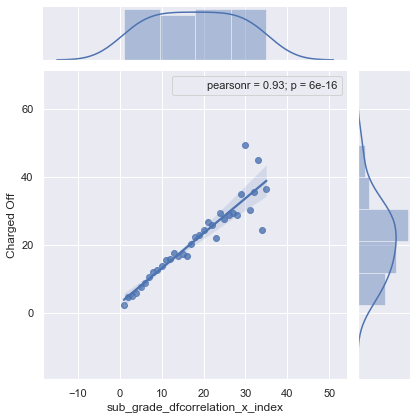

In [184]:
##--
sub_grade_df_plot = sns.jointplot('sub_grade_dfcorrelation_x_index', 'Charged Off', sub_grade_df,kind="reg")
sub_grade_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between sub grade and percentage charged off increase in bin.

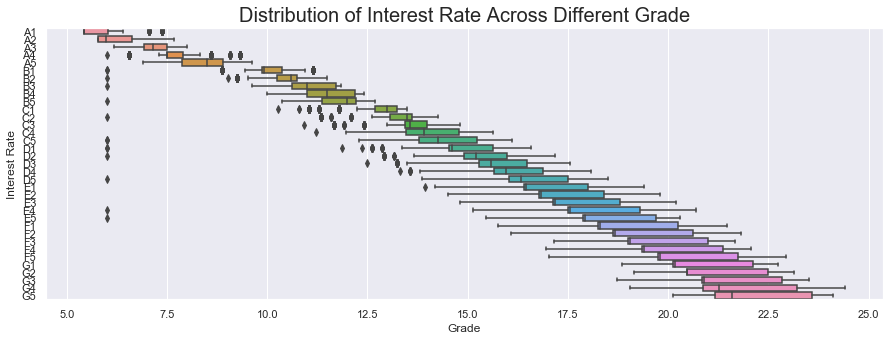

In [185]:
sns.boxplot(raw_data.int_rate, raw_data['sub_grade'], order=list(raw_data.groupby(by='sub_grade').sub_grade.count().index))
plt.title("Distribution of Interest Rate Across Different Grade", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

**Observation**
- When Sub-Grade Column is plotted against Interest Rate, we ought to observe this behavior wherein majority charged off applicants are levied with higher interest rate to recover the principal amount

### 3.7 Analysis of "Employee Title" column

In [186]:
raw_data.emp_title.value_counts().head(10)

us army              284
self employed        131
bank of america      129
us air force         114
walmart              107
us postal service    106
at&t                  87
jp morgan chase       83
us navy               77
kaiser permanente     66
Name: emp_title, dtype: int64

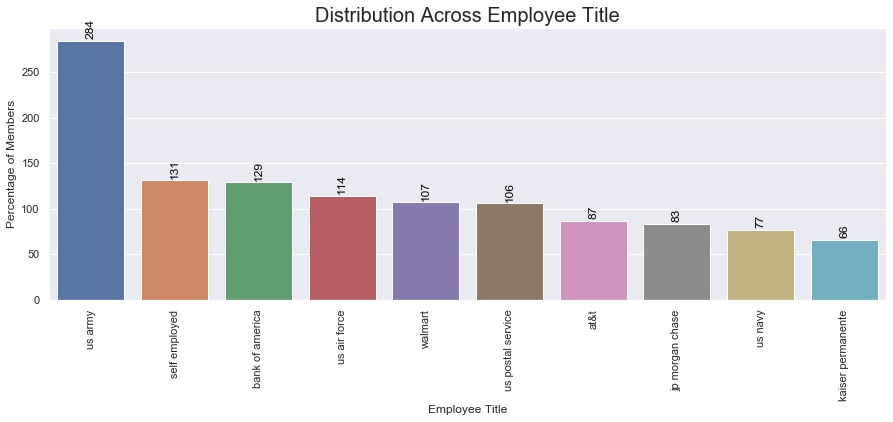

In [187]:
emp_title_dist = raw_data.emp_title.value_counts().head(10)
graph_1 = sns.barplot(x=emp_title_dist.index, y=emp_title_dist.values)
plt.title('Distribution Across Employee Title', fontdict={'fontsize': 20})
label_deviation_above_y_axis = emp_title_dist.max() * 0.015
for index, value in enumerate(emp_title_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Employee Title")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observation**
- **Employee Title, categorical nomial variable.**
- We see that, members who are employeed with US Army, Navy or Air Force / Self Employeed are risky candidates.

### 3.8 Analysis of "Employee Length" column

In [188]:
##--
raw_data.emp_length.describe()
# To get basic understanding of variable and its distribution.

count    34662.000000
mean         4.967313
std          3.534307
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

##--
**Observations**
- **Employee Length, categorical length ordinal data, varies from 0(no exp) to 10 (10+ exp)**
- Maximum applicants have 10+ experiance, i.e. 22.5% applicants are in 10+ category.

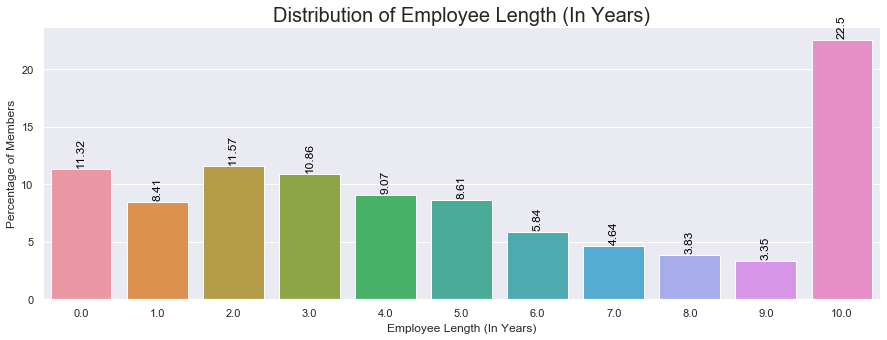

In [189]:
emp_length_dist = raw_data.groupby(by='emp_length').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=emp_length_dist.index, y=emp_length_dist.values)
plt.title('Distribution of Employee Length (In Years)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = emp_length_dist.max() * 0.015
for index, value in enumerate(emp_length_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Employee Length (In Years)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation**
- Considering Univariate Analysis of Employee Length column, percentage of members decreases as Employee Increases.
- Here we see a sharp increase in Employee Length of more than 10 years. However, the reason behind this can be, clubbing of all the employee length into one group. (i.e. 10, 11, 12, 13 etc. all in one group)

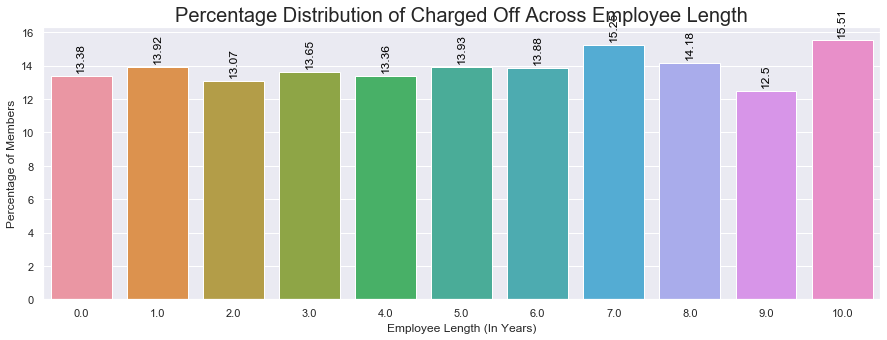

In [190]:
emp_len_df = raw_data.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
emp_len_df['total'] = emp_len_df.sum(axis=1)
emp_len_df = emp_len_df.iloc[:,:-1].div(emp_len_df["total"], axis=0)*100
chart = sns.barplot(x = emp_len_df['Charged Off'].index, y=emp_len_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
for index, value in enumerate(emp_len_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Employee Length (In Years)")
plt.ylabel("Percentage of Members")
plt.title("Percentage Distribution of Charged Off Across Employee Length", fontdict={'fontsize': 20})
plt.show()
# emp_len_df

**Observation**
- We see that, as the Employee Length increases, proportion of members getting default also increases although the increase is very small.

In [191]:
##--
emp_len_df_x_index_list = [*range(1, emp_len_df.shape[0]+1, 1)] 
emp_len_df['emp_len_dfcorrelation_x_index'] =emp_len_df_x_index_list
emp_len_df

loan_status  Charged Off  Fully Paid  emp_len_dfcorrelation_x_index
emp_length                                                         
0.0            13.379205   86.620795                              1
1.0            13.923182   86.076818                              2
2.0            13.067332   86.932668                              3
3.0            13.648433   86.351567                              4
4.0            13.363029   86.636971                              5
5.0            13.931681   86.068319                              6
6.0            13.883399   86.116601                              7
7.0            15.245800   84.754200                              8
8.0            14.177979   85.822021                              9
9.0            12.500000   87.500000                             10
10.0           15.512821   84.487179                             11

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


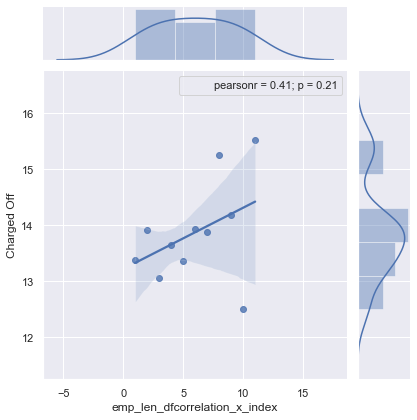

In [192]:
##--
emp_len_df_plot = sns.jointplot('emp_len_dfcorrelation_x_index', 'Charged Off', emp_len_df,kind="reg")
emp_len_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between sub grade and percentage charged off increase in bin.
- The trend is positive however value is low.

### 3.9 Analysis of "Home Ownership" column

In [193]:
##--
raw_data.home_ownership.value_counts(normalize=True)*100

RENT        48.794068
MORTGAGE    43.843402
OWN          7.102879
OTHER        0.259650
Name: home_ownership, dtype: float64

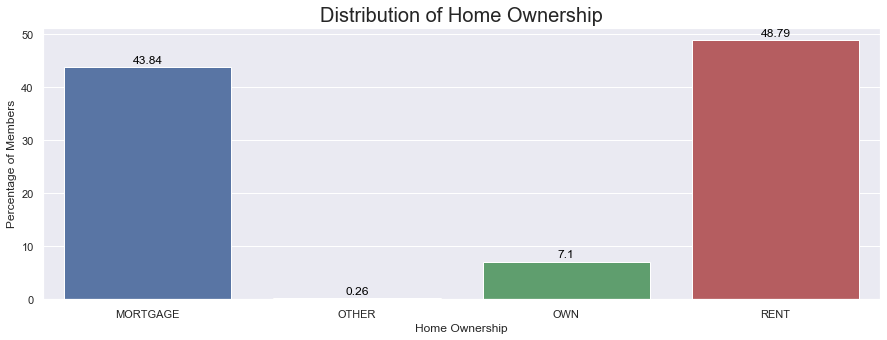

In [194]:
home_ownership_dist = raw_data.groupby(by='home_ownership').grade.count() / len(raw_data) * 100
home_ownership_dist = home_ownership_dist.sort_index()
graph_1 = sns.barplot(x=home_ownership_dist.index, y=home_ownership_dist.values)
plt.title('Distribution of Home Ownership', fontdict={'fontsize': 20})
label_deviation_above_y_axis = home_ownership_dist.max() * 0.015
for index, value in enumerate(home_ownership_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Home Ownership")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Home ownership, categorical nominal variable, available in Mortgage,Other,Own,Rent.**
- Rent category has maximum applicants i.e. 48%.

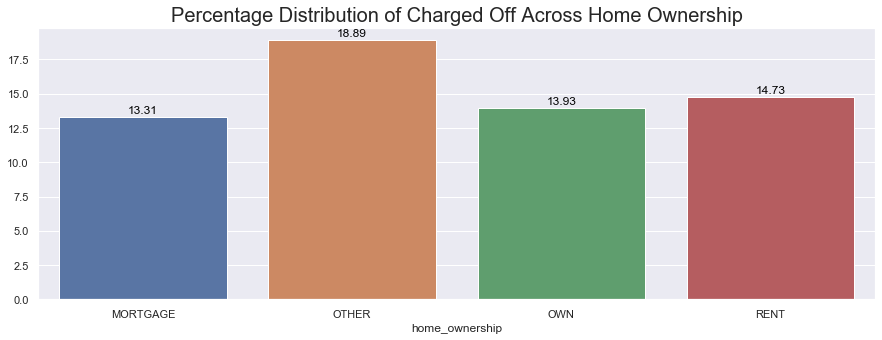

In [195]:
home_own_df = raw_data.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
home_own_df['total'] = home_own_df.sum(axis=1)
home_own_df = home_own_df.iloc[:,:-1].div(home_own_df["total"], axis=0)*100
home_own_df = home_own_df.sort_index()
chart = sns.barplot(x = home_own_df['Charged Off'].index, y=home_own_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = home_own_df['Charged Off'].max() * 0.015
for index, value in enumerate(home_own_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")

plt.title("Percentage Distribution of Charged Off Across Home Ownership", fontdict={'fontsize': 20})
plt.show()
# home_own_df

In [282]:
##--
home_own_df_x_index_list = [*range(1, home_own_df.shape[0]+1, 1)] 
home_own_df['home_own_dfcorrelation_x_index'] =home_own_df_x_index_list
home_own_df
##unordered, categorical, there is no fix order, and could vary based perspective of analyser should be used with experiance

loan_status     Charged Off  Fully Paid  home_own_dfcorrelation_x_index
home_ownership                                                         
MORTGAGE          13.305258   86.694742                               1
OTHER             18.888889   81.111111                               2
OWN               13.931763   86.068237                               3
RENT              14.734228   85.265772                               4

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


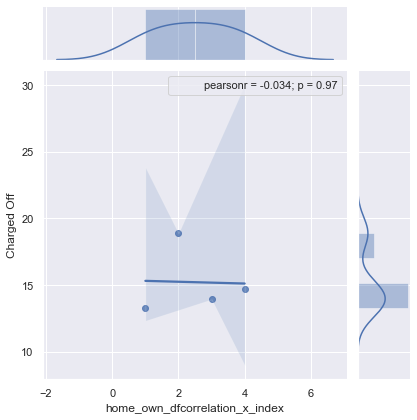

In [197]:
##--
home_own_df_plot = sns.jointplot('home_own_dfcorrelation_x_index', 'Charged Off', home_own_df,kind="reg")
home_own_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between home ownership and percentage charged off increase in bin.
- As seen from above plot correlation coefficient is close to zero, this variable will have minimal impact of deciding a charged off cases.

### 3.10 Analysis of "Annual Income" column

In [198]:
##--
raw_data.annual_inc.describe()
# To get basic understanding of variable and its distribution.

count     34662.000000
mean      64322.941201
std       31684.612224
min        4000.000000
25%       41000.000000
50%       58038.500000
75%       80000.000000
max      182952.000000
Name: annual_inc, dtype: float64

In [199]:
##--
(raw_data.annual_inc.value_counts(normalize=True)*100).head(10)

60000.0    3.839940
50000.0    2.688823
40000.0    2.250303
45000.0    2.149328
65000.0    2.120478
75000.0    2.111823
30000.0    2.033928
70000.0    1.912757
48000.0    1.785817
55000.0    1.754082
Name: annual_inc, dtype: float64

##--
**Observations**
- **Annual Income, Contineous qualitative variable, ranging from 4000 to 182952.**
- Mean of the data is around 64322, and median is around 58038.

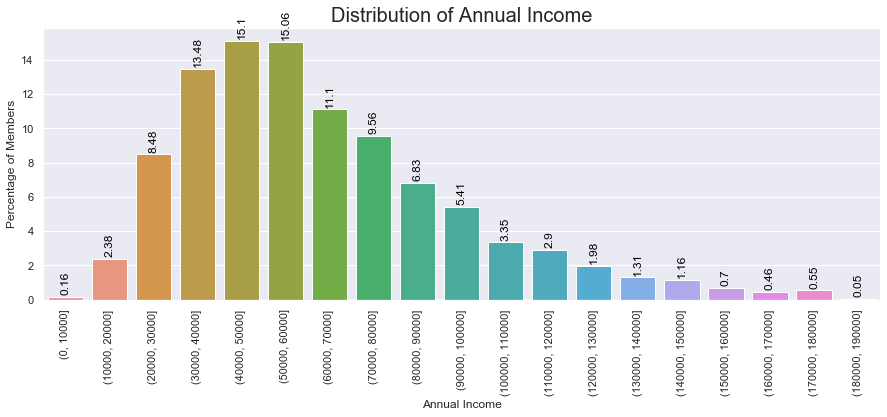

In [200]:
annual_inc_dist = raw_data.annual_inc_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=annual_inc_dist.index, y=annual_inc_dist.values)
plt.title('Distribution of Annual Income', fontdict={'fontsize': 20})
label_deviation_above_y_axis = annual_inc_dist.max() * 0.015
for index, value in enumerate(annual_inc_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Annual Income")
plt.ylabel("Percentage of Members")
plt.show()

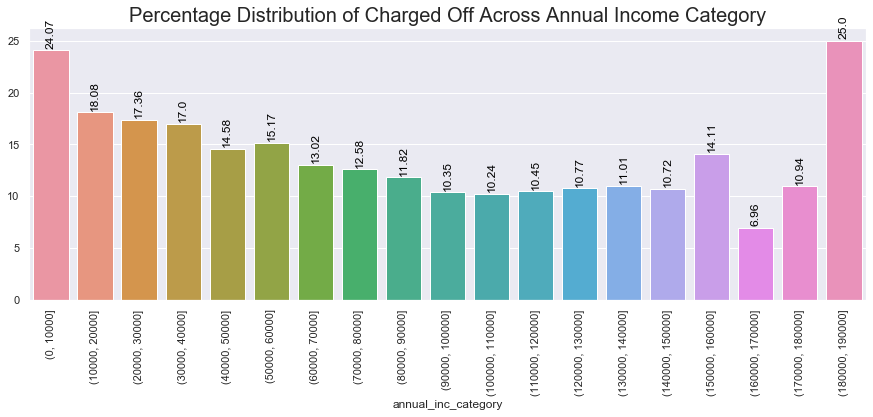

In [201]:
income_df = raw_data.pivot_table(index='annual_inc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
income_df['total'] = income_df.sum(axis=1)
income_df = income_df.iloc[:,:-1].div(income_df["total"], axis=0)*100
chart = sns.barplot(x = income_df['Charged Off'].index, y=income_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

label_deviation_above_y_axis = income_df['Charged Off'].max() * 0.015
for index, value in enumerate(income_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')

plt.title("Percentage Distribution of Charged Off Across Annual Income Category", fontdict={'fontsize': 20})
plt.show()
# income_df

**Observation**
- We see that, as the Annual Income increases, proportion of members getting default decreases.

In [202]:
##--
income_df_x_index_list = [*range(1, income_df.shape[0]+1, 1)] 
income_df['income_dfcorrelation_x_index'] =income_df_x_index_list
income_df

loan_status          Charged Off  Fully Paid  income_dfcorrelation_x_index
annual_inc_category                                                       
(0, 10000]             24.074074   75.925926                             1
(10000, 20000]         18.082524   81.917476                             2
(20000, 30000]         17.358747   82.641253                             3
(30000, 40000]         16.998501   83.001499                             4
(40000, 50000]         14.577761   85.422239                             5
(50000, 60000]         15.172414   84.827586                             6
(60000, 70000]         13.016368   86.983632                             7
(70000, 80000]         12.582981   87.417019                             8
(80000, 90000]         11.824324   88.175676                             9
(90000, 100000]        10.352188   89.647812                            10
(100000, 110000]       10.240964   89.759036                            11
(110000, 120000]       10.447761   89.552239                            12
(120000, 130000]       10.771470   89.228530                            13
(130000, 140000]       11.013216   88.986784                            14
(140000, 150000]       10.723192   89.276808                            15
(150000, 160000]       14.107884   85.892116                            16
(160000, 170000]        6.962025   93.037975                            17
(170000, 180000]       10.937500   89.062500                            18
(180000, 190000]       25.000000   75.000000                            19

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


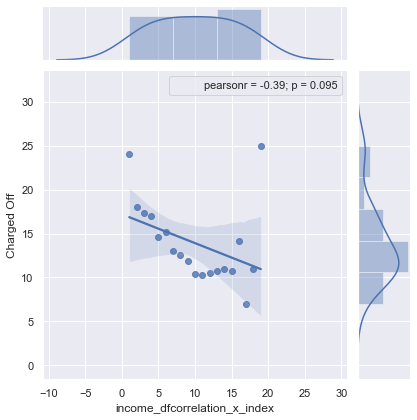

In [203]:
##--
    income_df_plot = sns.jointplot('income_dfcorrelation_x_index', 'Charged Off', income_df,kind="reg")
    income_df_plot.annotate(stats.pearsonr)
    plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between annual income and percentage charged off increase in bin.
- Overall trend is negative, with coefficient of -0.39, meaning as annual income will decrease percentage charged off cases in bin.

### 3.11 Analysis of "Income Verification Status" column

In [204]:
##--
raw_data.verification_status.describe()
# To get basic understanding of variable and its distribution.

count            34662
unique               3
top       Not Verified
freq             14708
Name: verification_status, dtype: object

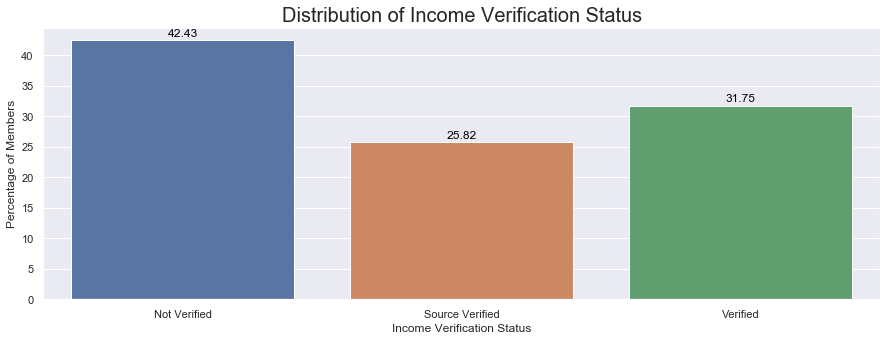

In [205]:
verification_status_dist = raw_data.groupby(by='verification_status').grade.count() / len(raw_data) * 100
verification_status_dist = verification_status_dist.sort_index()
graph_1 = sns.barplot(x=verification_status_dist.index, y=verification_status_dist.values)
plt.title('Distribution of Income Verification Status', fontdict={'fontsize': 20})
label_deviation_above_y_axis = verification_status_dist.max() * 0.015
for index, value in enumerate(verification_status_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Income Verification Status")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Income verification status, categorical nominal variable, categorised as Not Verified, Source Verified, Verified.**
- In total applications Not verified applications are more in number, shres 42% of availabe data.

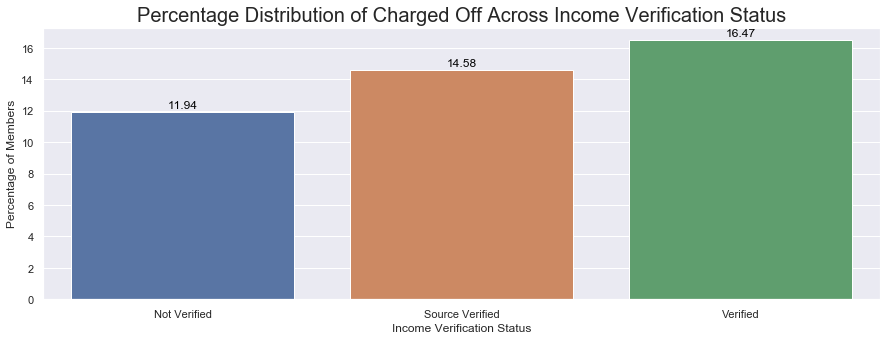

In [206]:
inc_ver_df = raw_data.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
inc_ver_df['total'] = inc_ver_df.sum(axis=1)
inc_ver_df = inc_ver_df.iloc[:,:-1].div(inc_ver_df["total"], axis=0)*100
chart = sns.barplot(x = inc_ver_df['Charged Off'].index, y=inc_ver_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = inc_ver_df['Charged Off'].max() * 0.015
for index, value in enumerate(inc_ver_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")

plt.title("Percentage Distribution of Charged Off Across Income Verification Status", fontdict={'fontsize': 20})
plt.xlabel("Income Verification Status")
plt.ylabel("Percentage of Members")
plt.show()
# inc_ver_df

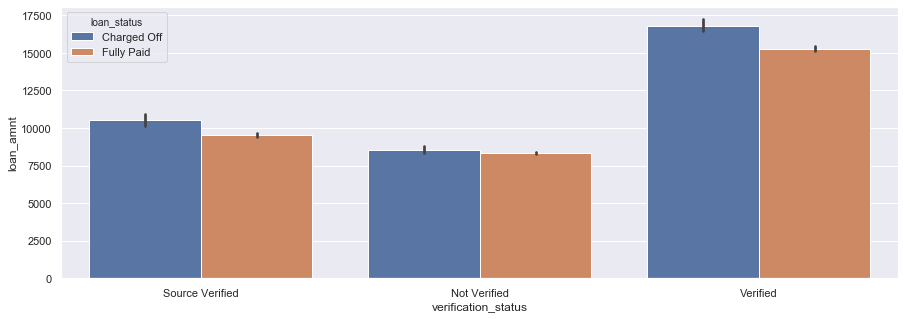

In [207]:
##--
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=raw_data, estimator=np.mean)

##--
**Observation**
- fFrom bar chart it is evident that verified applications are mostly from higher loan amount application, and from previous observations we know that higher loan amount application have higher chances of being charged off, so intern the inference that verified category have higher charged off cases is not entirly true.
- This is in direct effect as bias of verification is towards higher loan amount.

### 3.12 Analysis of "Issue Date (Year)" column

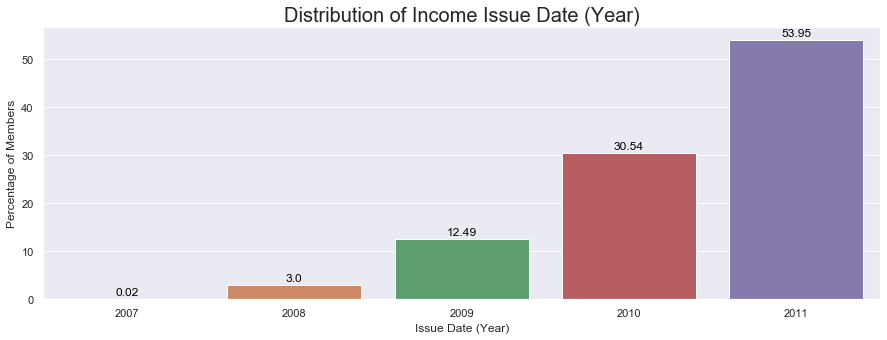

In [208]:
issue_d_year_dist = raw_data.issue_d_year.value_counts(normalize=True, sort=False)*100
issue_d_year_dist = issue_d_year_dist.sort_index()
graph_1 = sns.barplot(x=issue_d_year_dist.index, y=issue_d_year_dist.values)
plt.title('Distribution of Income Issue Date (Year)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = issue_d_year_dist.max() * 0.015
for index, value in enumerate(issue_d_year_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Issue Date (Year)")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Issue date year, categorical ordinal variable, categorised in 2007,2008,2009,2010,2011.**
- Number of loan applications are increasing with the year, maximum loan applications are received in 2011.

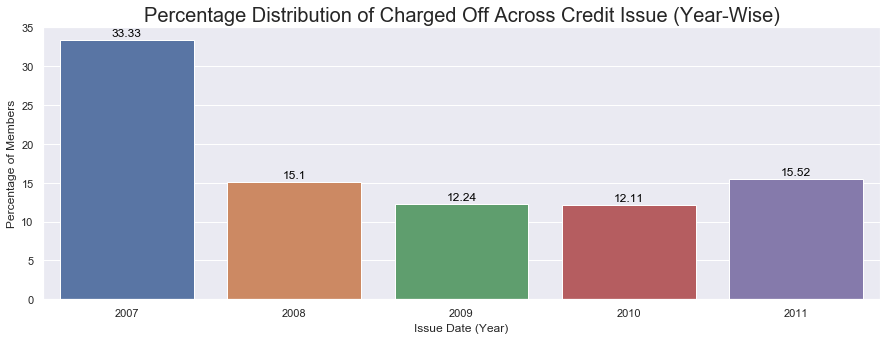

In [209]:
issue_d_year_df = raw_data.pivot_table(index='issue_d_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_year_df['total'] = issue_d_year_df.sum(axis=1)
issue_d_year_df = issue_d_year_df.iloc[:,:-1].div(issue_d_year_df["total"], axis=0)*100
chart = sns.barplot(x = issue_d_year_df['Charged Off'].index, y=issue_d_year_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = issue_d_year_df['Charged Off'].max() * 0.015
for index, value in enumerate(issue_d_year_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")

plt.title("Percentage Distribution of Charged Off Across Credit Issue (Year-Wise)", fontdict={'fontsize': 20})
plt.xlabel("Issue Date (Year)")
plt.ylabel("Percentage of Members")
plt.show()
# issue_d_year_df

**Observation**
- 2007 is having maximum percentage of default loans
- As the years are crossing by, defaulter list is decreasing. This means, bank officials are adopting better techniques on identifying the defaulters.

In [210]:
##--
issue_d_year_df_x_index_list = [*range(1, issue_d_year_df.shape[0]+1, 1)] 
issue_d_year_df['issue_d_year_dfcorrelation_x_index'] =issue_d_year_df_x_index_list
issue_d_year_df

loan_status   Charged Off  Fully Paid  issue_d_year_dfcorrelation_x_index
issue_d_year                                                             
2007            33.333333   66.666667                                   1
2008            15.096154   84.903846                                   2
2009            12.237359   87.762641                                   3
2010            12.110334   87.889666                                   4
2011            15.524894   84.475106                                   5

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


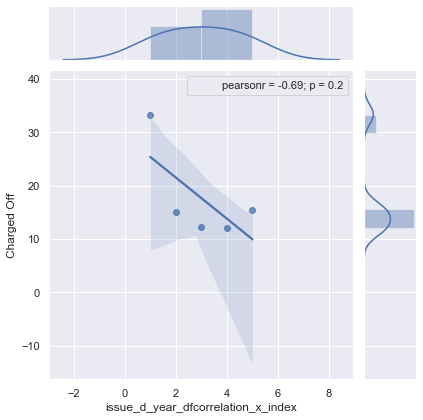

In [211]:
##--
issue_d_year_df_plot = sns.jointplot('issue_d_year_dfcorrelation_x_index', 'Charged Off', issue_d_year_df,kind="reg")
issue_d_year_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between issue date year and percentage charged off increase in bin.
- Overall trend is negative, with coefficient of -0.69, meaning as  issue date year will decrease percentage charged off cases in bin.

### 3.13 Analysis of "Issue Date (Month)" column

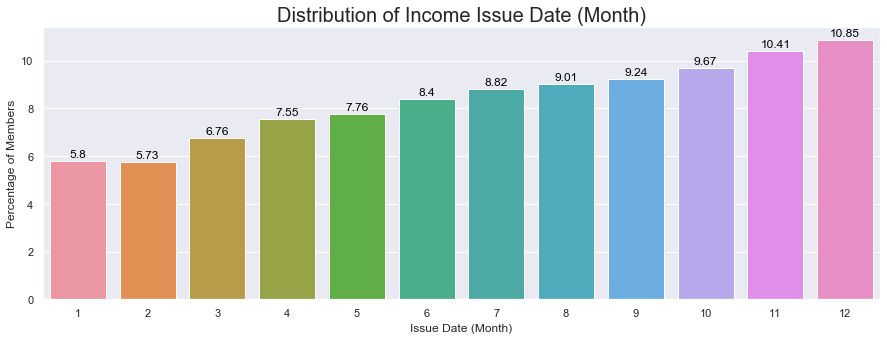

In [212]:
issue_d_month_dist = raw_data.issue_d_month.value_counts(normalize=True, sort=False)*100
issue_d_month_dist = issue_d_month_dist.sort_index()
graph_1 = sns.barplot(x=issue_d_month_dist.index, y=issue_d_month_dist.values)
plt.title('Distribution of Income Issue Date (Month)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = issue_d_month_dist.max() * 0.015
for index, value in enumerate(issue_d_month_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Issue Date (Month)")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Issue date year, categorical ordinal variable, categorised in 1-12.**
- Number of loan applications are increasing with the month, maximum loan applications are received in December.

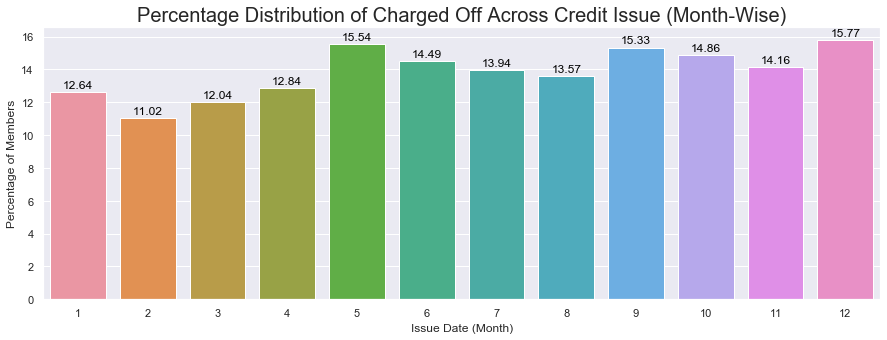

In [213]:
issue_d_mon_df = raw_data.pivot_table(index='issue_d_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_mon_df['total'] = issue_d_mon_df.sum(axis=1)
issue_d_mon_df = issue_d_mon_df.iloc[:,:-1].div(issue_d_mon_df["total"], axis=0)*100
chart = sns.barplot(x = issue_d_mon_df['Charged Off'].index, y=issue_d_mon_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = issue_d_mon_df['Charged Off'].max() * 0.015
for index, value in enumerate(issue_d_mon_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Month-Wise)", fontdict={'fontsize': 20})
plt.xlabel("Issue Date (Month)")
plt.ylabel("Percentage of Members")
plt.show()
# issue_d_mon_df

##--
**Observations**
- There is positive treand in percentage charged off categorical plot.

In [214]:
##--
issue_d_mon_df_x_index_list = [*range(1, issue_d_mon_df.shape[0]+1, 1)] 
issue_d_mon_df['issue_d_mon_dfcorrelation_x_index'] =issue_d_mon_df_x_index_list
issue_d_mon_df

loan_status    Charged Off  Fully Paid  issue_d_mon_dfcorrelation_x_index
issue_d_month                                                            
1                12.643106   87.356894                                  1
2                11.021641   88.978359                                  2
3                12.035851   87.964149                                  3
4                12.844037   87.155963                                  4
5                15.539033   84.460967                                  5
6                14.486783   85.513217                                  6
7                13.939791   86.060209                                  7
8                13.572343   86.427657                                  8
9                15.334166   84.665834                                  9
10               14.856802   85.143198                                 10
11               14.155125   85.844875                                 11
12               15.771277   84.228723                                 12

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


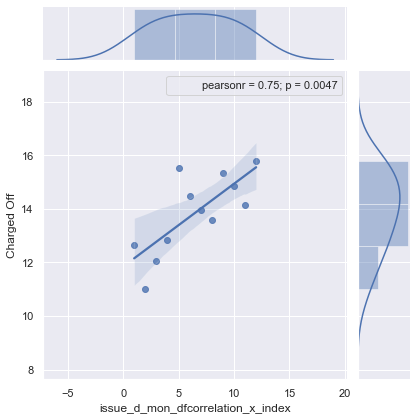

In [215]:
##--
issue_d_mon_df_plot = sns.jointplot('issue_d_mon_dfcorrelation_x_index', 'Charged Off', issue_d_mon_df,kind="reg")
issue_d_mon_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between issue date month and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.75, meaning as issue date month will decrease percentage charged off cases in bin.

### 3.14 Analysis of "Purpose" column

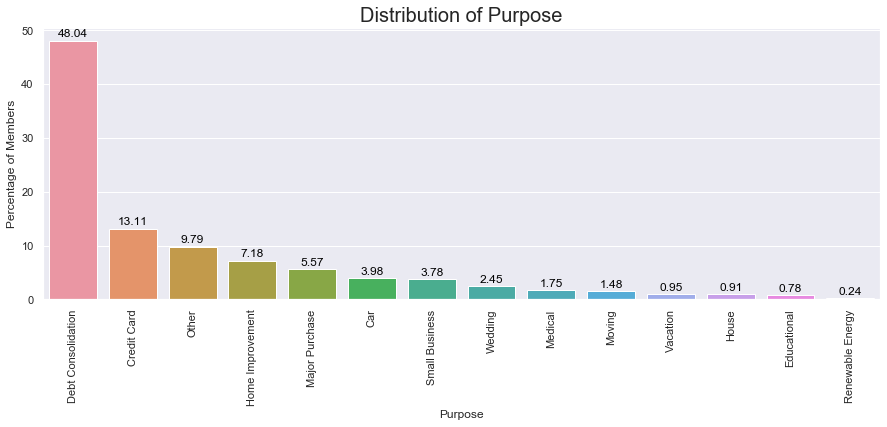

In [216]:
purpose_dist = raw_data.purpose.value_counts(normalize=True, sort=True)*100
graph_1 = sns.barplot(x=purpose_dist.index, y=purpose_dist.values)
plt.title('Distribution of Purpose', fontdict={'fontsize': 20})
label_deviation_above_y_axis = purpose_dist.max() * 0.015
for index, value in enumerate(purpose_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Purpose")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observation**
- **Purpose, Categorical nominal variable, categorised in Debt Consolidation, Credit card, etc.**
- This column has total count of 34662, has unique values 17352, top title frequency is of 'Debt Consolidation'.

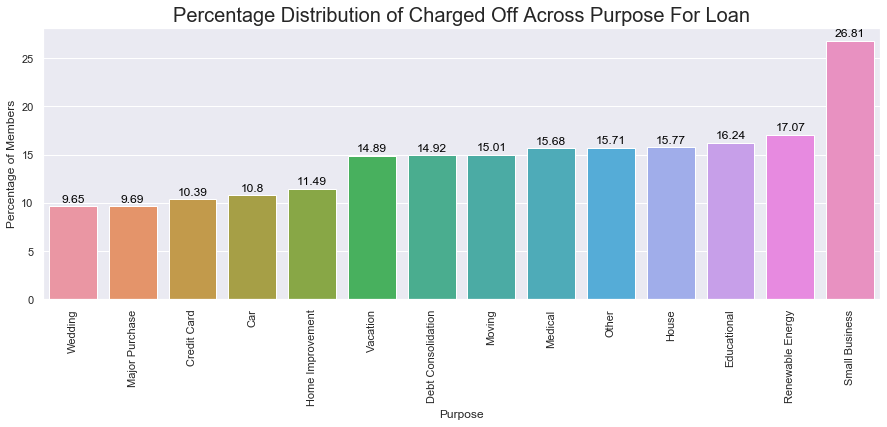

In [217]:
purpose_df = raw_data.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
purpose_df['total'] = purpose_df.sum(axis=1)
purpose_df = purpose_df.iloc[:,:-1].div(purpose_df["total"], axis=0)*100
purpose_df = purpose_df.sort_values(by=['Charged Off'])
chart = sns.barplot(x = purpose_df['Charged Off'].index, y=purpose_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
label_deviation_above_y_axis = purpose_df['Charged Off'].max() * 0.015
for index, value in enumerate(purpose_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Purpose For Loan", fontdict={'fontsize': 20})
plt.xlabel("Purpose")
plt.ylabel("Percentage of Members")
plt.show()
# purpose_df

##--
**Observations**
- Positive treand is available with small coefficient value.
- Small Business category has highest default applications, may be because of the risk involved in starting and sustaining of small businesses.

### 3.15 Analysis of "State" column

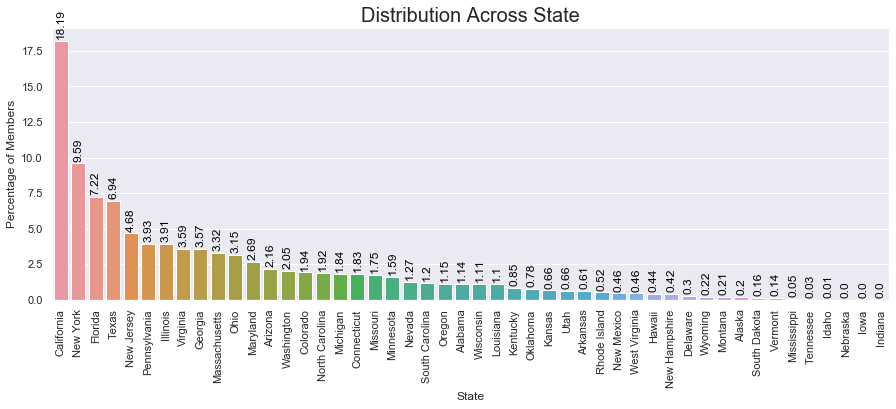

In [218]:
addr_state_name_dist = raw_data.addr_state_name.value_counts(normalize=True, sort=True)*100
graph_1 = sns.barplot(x=addr_state_name_dist.index, y=addr_state_name_dist.values)
plt.title('Distribution Across State', fontdict={'fontsize': 20})
label_deviation_above_y_axis = addr_state_name_dist.max() * 0.015
for index, value in enumerate(addr_state_name_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("State")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **State, categorical nominal variable, categorised in different states in USA.**
- Maximum applicants are from California.

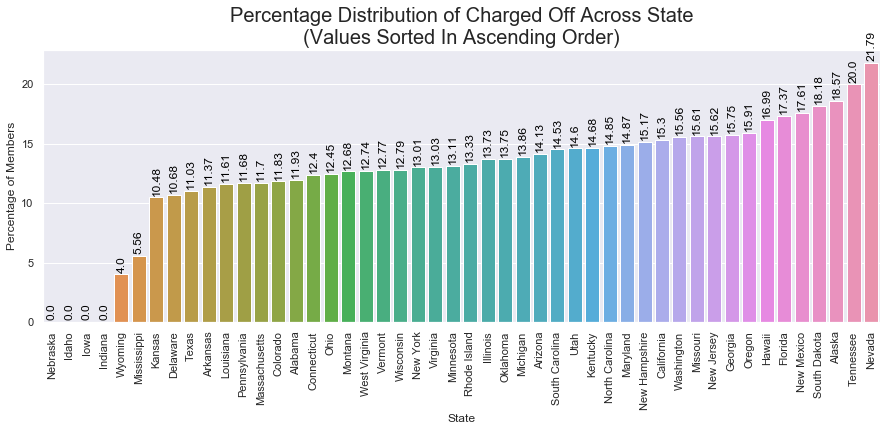

In [219]:
state_df = raw_data.pivot_table(index='addr_state_name', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
state_df['total'] = state_df.sum(axis=1)
state_df = state_df.iloc[:,:-1].div(state_df["total"], axis=0)*100
state_df = state_df.sort_values(by=['Charged Off'])
chart = sns.barplot(x = state_df['Charged Off'].index, y=state_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

label_deviation_above_y_axis = state_df['Charged Off'].max() * 0.015
for index, value in enumerate(state_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("State")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across State\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 20})
plt.show()
# state_df

##--
**Observation**
- Nevada has maximum percentage of charged off cases.

In [220]:
Image(url="state_wise_charged_off.png")

### 3.16 Analysis of "DTI" column

In [221]:
##--
raw_data.dti.describe()
# To get basic understanding of variable and its distribution.

count    34662.000000
mean        13.496320
std          6.621454
min          0.000000
25%          8.430000
50%         13.620000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

##--
**Observations**
- **DTI, contineous variable**
- Mean for the data is around 13.5 and median is around 13.62.

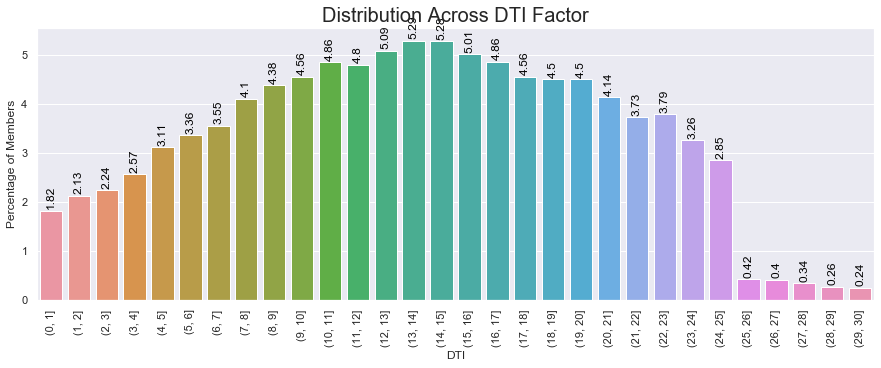

In [222]:
dti_category_dist = raw_data.dti_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=dti_category_dist.index, y=dti_category_dist.values)
plt.title('Distribution Across DTI Factor', fontdict={'fontsize': 20})
label_deviation_above_y_axis = dti_category_dist.max() * 0.015
for index, value in enumerate(dti_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("DTI")
plt.ylabel("Percentage of Members")
plt.show()

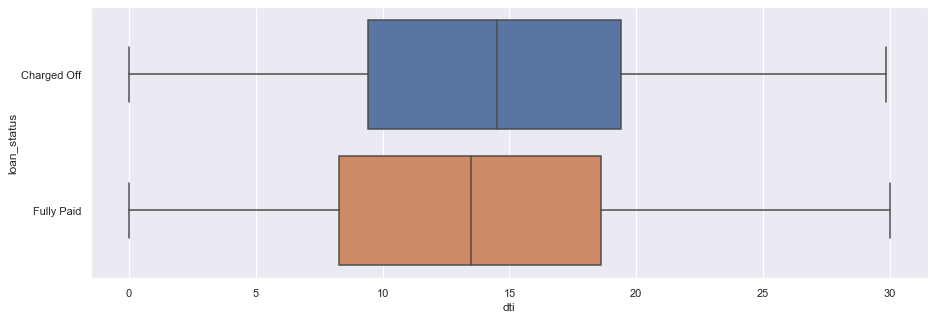

In [223]:
sns.boxplot(x=raw_data['dti'], y=raw_data['loan_status'], data=raw_data)
plt.show()

**Observation**
- Median and mean for values for dti in charged off category are on higher side.

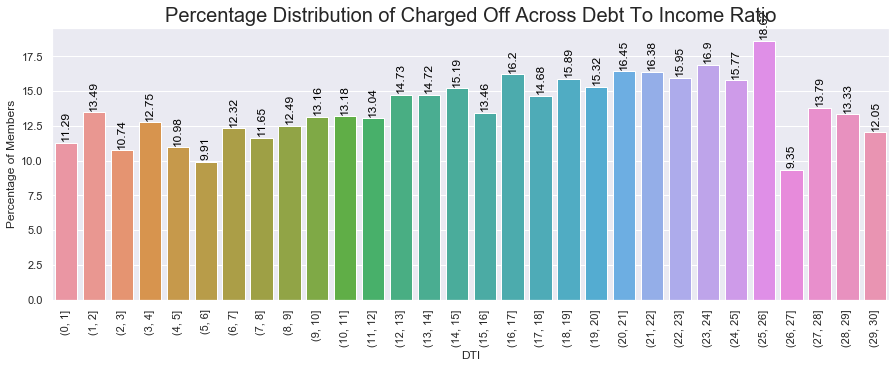

In [224]:
dti_df = raw_data.pivot_table(index='dti_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
dti_df['total'] = dti_df.sum(axis=1)
dti_df = dti_df.iloc[:,:-1].div(dti_df["total"], axis=0)*100
chart = sns.barplot(x = dti_df['Charged Off'].index, y=dti_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
label_deviation_above_y_axis = dti_df['Charged Off'].max() * 0.015
for index, value in enumerate(dti_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("DTI")
plt.ylabel("Percentage of Members")
plt.title("Percentage Distribution of Charged Off Across Debt To Income Ratio", fontdict={'fontsize': 20})
plt.show()
# dti_df

##--
Check????????????????????????????????
**Observation**
- As the seen from graph the charged of percent in category increases as dti increases.
- After 20dti application should be categorise as risky application.

In [225]:
##--
dti_df_x_index_list = [*range(1, dti_df.shape[0]+1, 1)] 
dti_df['dti_dfcorrelation_x_index'] =dti_df_x_index_list
dti_df

loan_status   Charged Off  Fully Paid  dti_dfcorrelation_x_index
dti_category                                                    
(0, 1]          11.287758   88.712242                          1
(1, 2]          13.487738   86.512262                          2
(2, 3]          10.737387   89.262613                          3
(3, 4]          12.753950   87.246050                          4
(4, 5]          10.976744   89.023256                          5
(5, 6]           9.913793   90.086207                          6
(6, 7]          12.316476   87.683524                          7
(7, 8]          11.652542   88.347458                          8
(8, 9]          12.491738   87.508262                          9
(9, 10]         13.159568   86.840432                         10
(10, 11]        13.178295   86.821705                         11
(11, 12]        13.043478   86.956522                         12
(12, 13]        14.732651   85.267349                         13
(13, 14]        14.723591   85.276409                         14
(14, 15]        15.194734   84.805266                         15
(15, 16]        13.460427   86.539573                         16
(16, 17]        16.200119   83.799881                         17
(17, 18]        14.675985   85.324015                         18
(18, 19]        15.894466   84.105534                         19
(19, 20]        15.315315   84.684685                         20
(20, 21]        16.445066   83.554934                         21
(21, 22]        16.381988   83.618012                         22
(22, 23]        15.954198   84.045802                         23
(23, 24]        16.903915   83.096085                         24
(24, 25]        15.768057   84.231943                         25
(25, 26]        18.620690   81.379310                         26
(26, 27]         9.352518   90.647482                         27
(27, 28]        13.793103   86.206897                         28
(28, 29]        13.333333   86.666667                         29
(29, 30]        12.048193   87.951807                         30

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


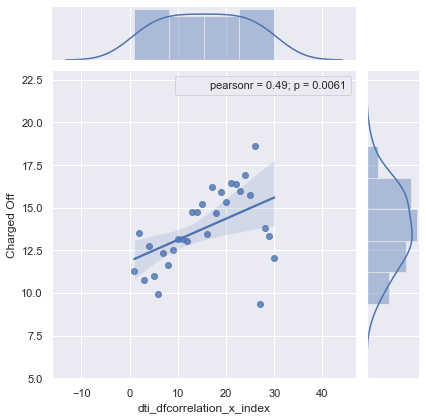

In [226]:
##--
dti_df_plot = sns.jointplot('dti_dfcorrelation_x_index', 'Charged Off', dti_df,kind="reg")
dti_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between dti and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.49, meaning as dti will decrease percentage charged off cases in bin.

### 3.17 Analysis of "Delinquency Count (in Last 2 Years)" column

In [227]:
##--
raw_data.delinq_2yrs.describe()
# To get basic understanding of variable and its distribution.

count    34662.000000
mean         0.145116
std          0.491586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

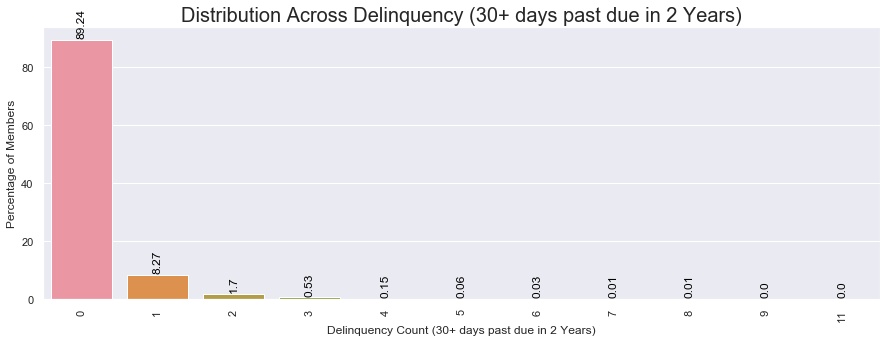

In [228]:
delinq_2yrs_dist = raw_data.delinq_2yrs.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=delinq_2yrs_dist.index, y=delinq_2yrs_dist.values)
plt.title('Distribution Across Delinquency (30+ days past due in 2 Years)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = delinq_2yrs_dist.max() * 0.015
for index, value in enumerate(delinq_2yrs_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Delinquency Count (30+ days past due in 2 Years)")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Delinquency Count (in Last 2 Years), categorical ordinal variable, categorised from 0-11**
- Maximum applicants have no Delinquency Count (in Last 2 Years).

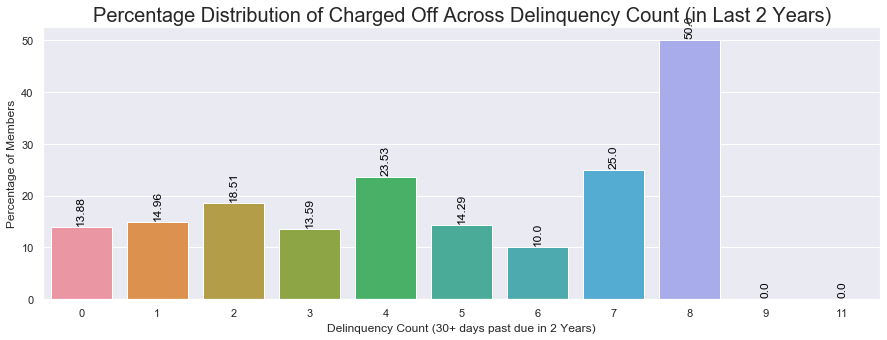

In [229]:
del_c_30_df = raw_data.pivot_table(index='delinq_2yrs', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
del_c_30_df['total'] = del_c_30_df.sum(axis=1)
del_c_30_df = del_c_30_df.iloc[:,:-1].div(del_c_30_df["total"], axis=0)*100
chart = sns.barplot(x = del_c_30_df['Charged Off'].index, y=del_c_30_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Delinquency Count (in Last 2 Years)", fontdict={'fontsize': 20})

label_deviation_above_y_axis = del_c_30_df['Charged Off'].max() * 0.015
for index, value in enumerate(del_c_30_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Delinquency Count (30+ days past due in 2 Years)")
plt.ylabel("Percentage of Members")

plt.show()
# del_c_30_df

**Observation**
- Except for Delinquency Count (in Last 2 Years) 7 and 8 there is no clear trend.
- Record count 7 and 8 increases the charged off cases substatially.

In [230]:
##--
del_c_30_df_x_index_list = [*range(1, del_c_30_df.shape[0]+1, 1)] 
del_c_30_df['del_c_30_dfcorrelation_x_index'] =del_c_30_df_x_index_list
del_c_30_df

loan_status  Charged Off  Fully Paid  del_c_30_dfcorrelation_x_index
delinq_2yrs                                                         
0              13.878831   86.121169                               1
1              14.963376   85.036624                               2
2              18.505942   81.494058                               3
3              13.586957   86.413043                               4
4              23.529412   76.470588                               5
5              14.285714   85.714286                               6
6              10.000000   90.000000                               7
7              25.000000   75.000000                               8
8              50.000000   50.000000                               9
9               0.000000  100.000000                              10
11              0.000000  100.000000                              11

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


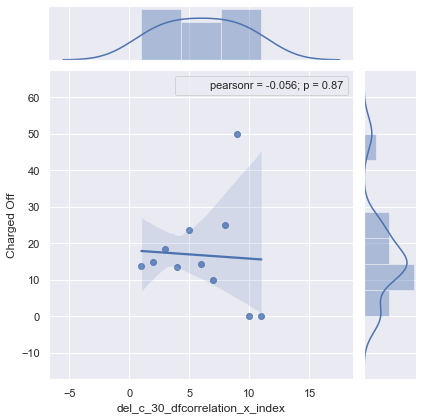

In [231]:
##--
del_c_30_df_plot = sns.jointplot('del_c_30_dfcorrelation_x_index', 'Charged Off',del_c_30_df,kind="reg")
del_c_30_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Delinquency Count (in Last 2 Years) and percentage charged off increase in bin.
- No clear trend formed, as coefficient is weak.

### 3.18 Analysis of "Earliest Credit Line Year" column

In [232]:
##--
(raw_data.earliest_cr_line_year.value_counts(normalize=True)*100).head()

2000    8.401131
1999    7.691420
1998    7.304829
2001    6.612429
1997    6.251803
Name: earliest_cr_line_year, dtype: float64

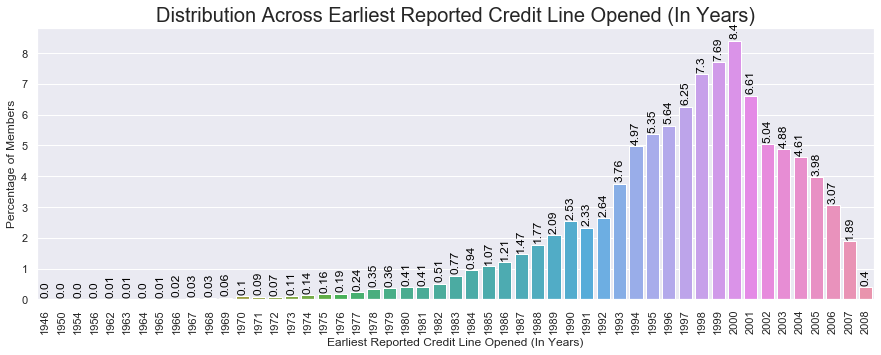

In [233]:
earliest_cr_line_year_dist = raw_data.groupby(by='earliest_cr_line_year').earliest_cr_line_year.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=earliest_cr_line_year_dist.index, y=earliest_cr_line_year_dist.values)
plt.title('Distribution Across Earliest Reported Credit Line Opened (In Years)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = earliest_cr_line_year_dist.max() * 0.015
for index, value in enumerate(earliest_cr_line_year_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Earliest Reported Credit Line Opened (In Years)")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Earliest Credit Line Year, categorical ordinal variable, categorised in year from 1946 to 2008.**
- Maximum count for earliest credit is in year 2000.

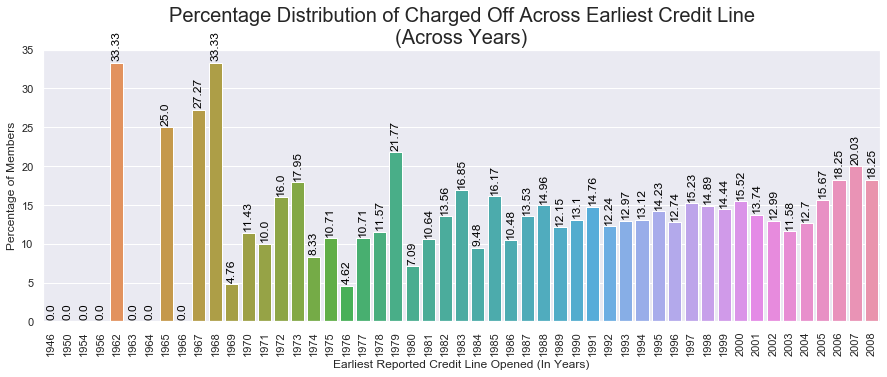

In [234]:
earliest_cr_year_df = raw_data.pivot_table(index='earliest_cr_line_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_year_df['total'] = earliest_cr_year_df.sum(axis=1)
earliest_cr_year_df = earliest_cr_year_df.iloc[:,:-1].div(earliest_cr_year_df["total"], axis=0)*100
chart = sns.barplot(x = earliest_cr_year_df['Charged Off'].index, y=earliest_cr_year_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
label_deviation_above_y_axis = earliest_cr_year_df['Charged Off'].max() * 0.015
for index, value in enumerate(earliest_cr_year_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Earliest Reported Credit Line Opened (In Years)")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Years)", fontdict={'fontsize': 20})
plt.show()
# earliest_cr_year_df

##--
Check??????????????????????????????????????????????????????????????
**Observation**
- We see that, as the year increases, proportion of members getting default also increases.

In [235]:
##--
earliest_cr_year_df_x_index_list = [*range(1, earliest_cr_year_df.shape[0]+1, 1)] 
earliest_cr_year_df['earliest_cr_year_dfcorrelation_x_index'] =earliest_cr_year_df_x_index_list
earliest_cr_year_df

loan_status            Charged Off  Fully Paid  \
earliest_cr_line_year                            
1946                      0.000000  100.000000   
1950                      0.000000  100.000000   
1954                      0.000000  100.000000   
1956                      0.000000  100.000000   
1962                     33.333333   66.666667   
1963                      0.000000  100.000000   
1964                      0.000000  100.000000   
1965                     25.000000   75.000000   
1966                      0.000000  100.000000   
1967                     27.272727   72.727273   
1968                     33.333333   66.666667   
1969                      4.761905   95.238095   
1970                     11.428571   88.571429   
1971                     10.000000   90.000000   
1972                     16.000000   84.000000   
1973                     17.948718   82.051282   
1974                      8.333333   91.666667   
1975                     10.714286   89.285714   
1976                      4.615385   95.384615   
1977                     10.714286   89.285714   
1978                     11.570248   88.429752   
1979                     21.774194   78.225806   
1980                      7.092199   92.907801   
1981                     10.638298   89.361702   
1982                     13.559322   86.440678   
1983                     16.853933   83.146067   
1984                      9.480122   90.519878   
1985                     16.172507   83.827493   
1986                     10.476190   89.523810   
1987                     13.529412   86.470588   
1988                     14.959350   85.040650   
1989                     12.154696   87.845304   
1990                     13.097950   86.902050   
1991                     14.764268   85.235732   
1992                     12.240437   87.759563   
1993                     12.970069   87.029931   
1994                     13.116657   86.883343   
1995                     14.231806   85.768194   
1996                     12.736573   87.263427   
1997                     15.228426   84.771574   
1998                     14.889415   85.110585   
1999                     14.441110   85.558890   
2000                     15.521978   84.478022   
2001                     13.743455   86.256545   
2002                     12.986270   87.013730   
2003                     11.583924   88.416076   
2004                     12.695435   87.304565   
2005                     15.674891   84.325109   
2006                     18.250235   81.749765   
2007                     20.030581   79.969419   
2008                     18.248175   81.751825   

loan_status            earliest_cr_year_dfcorrelation_x_index  
earliest_cr_line_year                                          
1946                                                        1  
1950                                                        2  
1954                                                        3  
1956                                                        4  
1962                                                        5  
1963                                                        6  
1964                                                        7  
1965                                                        8  
1966                                                        9  
1967                                                       10  
1968                                                       11  
1969                                                       12  
1970                                                       13  
1971                                                       14  
1972                                                       15  
1973                                                       16  
1974                                                       17  
1975                                                       18  
1976                                                       19  
1977 

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


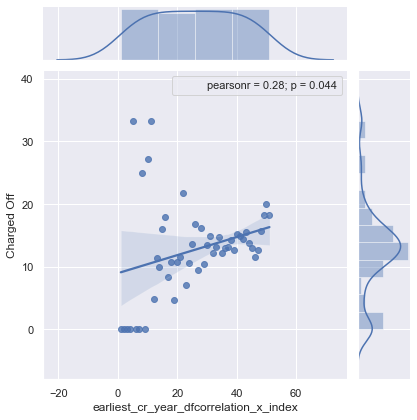

In [236]:
##--
earliest_cr_year_df_plot = sns.jointplot('earliest_cr_year_dfcorrelation_x_index', 'Charged Off',earliest_cr_year_df,kind="reg")
earliest_cr_year_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Earliest Credit Line Year and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.28, meaning as Earliest Credit Line Year will increase percentage charged off cases in bin.

### 3.19 Analysis of "Earliest Credit Line Month" column

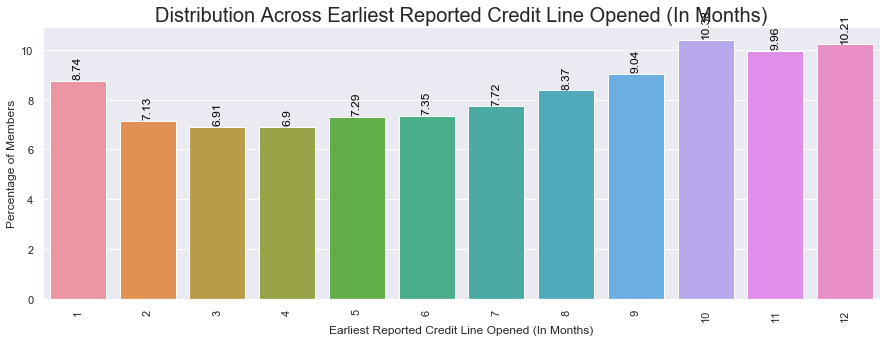

In [237]:
earliest_cr_line_month_dist = raw_data.groupby(by='earliest_cr_line_month').earliest_cr_line_month.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=earliest_cr_line_month_dist.index, y=earliest_cr_line_month_dist.values)
plt.title('Distribution Across Earliest Reported Credit Line Opened (In Months)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = earliest_cr_line_month_dist.max() * 0.015
for index, value in enumerate(earliest_cr_line_month_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Earliest Reported Credit Line Opened (In Months)")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Earliest Credit Line Month, categorical ordinal variable, categorised in year from 1-12**
- Maximum count for earliest credit is in year 10th month.

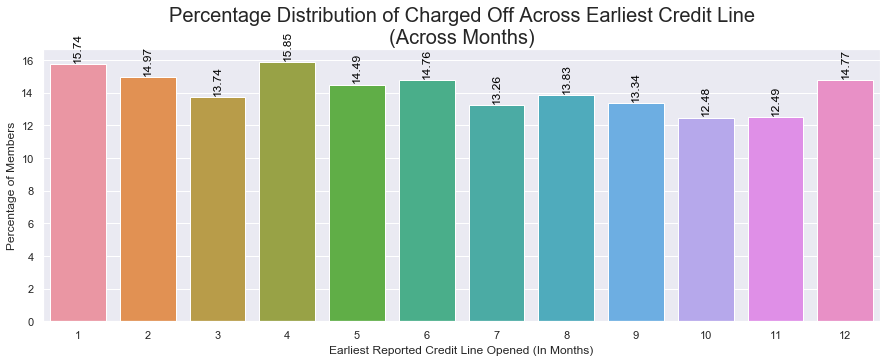

In [238]:
earliest_cr_month_df = raw_data.pivot_table(index='earliest_cr_line_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_month_df['total'] = earliest_cr_month_df.sum(axis=1)
earliest_cr_month_df = earliest_cr_month_df.iloc[:,:-1].div(earliest_cr_month_df["total"], axis=0)*100
chart = sns.barplot(x = earliest_cr_month_df['Charged Off'].index, y=earliest_cr_month_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = earliest_cr_month_df['Charged Off'].max() * 0.015
for index, value in enumerate(earliest_cr_month_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Earliest Reported Credit Line Opened (In Months)")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Months)", fontdict={'fontsize': 20})
plt.show()
# earliest_cr_month_df

##--
Check?????????????????????????????????????????????????????????????????
**Observation**
- We see that, as the month changes from Jan to Dec, proportion of members getting default decreases.

In [239]:
##--
earliest_cr_month_df_x_index_list = [*range(1, earliest_cr_month_df.shape[0]+1, 1)] 
earliest_cr_month_df['earliest_cr_month_dfcorrelation_x_index'] =earliest_cr_month_df_x_index_list
earliest_cr_month_df

loan_status             Charged Off  Fully Paid  \
earliest_cr_line_month                            
1                         15.742574   84.257426   
2                         14.973695   85.026305   
3                         13.736952   86.263048   
4                         15.851108   84.148892   
5                         14.489311   85.510689   
6                         14.756672   85.243328   
7                         13.261113   86.738887   
8                         13.827586   86.172414   
9                         13.341845   86.658155   
10                        12.475688   87.524312   
11                        12.485516   87.514484   
12                        14.774011   85.225989   

loan_status             earliest_cr_month_dfcorrelation_x_index  
earliest_cr_line_month                                           
1                                                             1  
2                                                             2  
3                                                             3  
4                                                             4  
5                                                             5  
6                                                             6  
7                                                             7  
8                                                             8  
9                                                             9  
10                                                           10  
11                                                           11  
12                                                           12

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


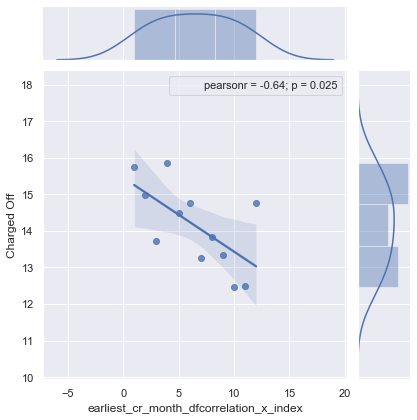

In [240]:
##--
earliest_cr_month_df_plot = sns.jointplot('earliest_cr_month_dfcorrelation_x_index', 'Charged Off',earliest_cr_month_df,kind="reg")
earliest_cr_month_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Earliest Credit Line Month and percentage charged off increase in bin.
- Overall trend is negative, with coefficient of -0.64, meaning as Earliest Credit Line Month will decrease percentage charged off cases in bin.

### 3.20 Analysis of "Inquiries Count (In Last 6 Months)" column

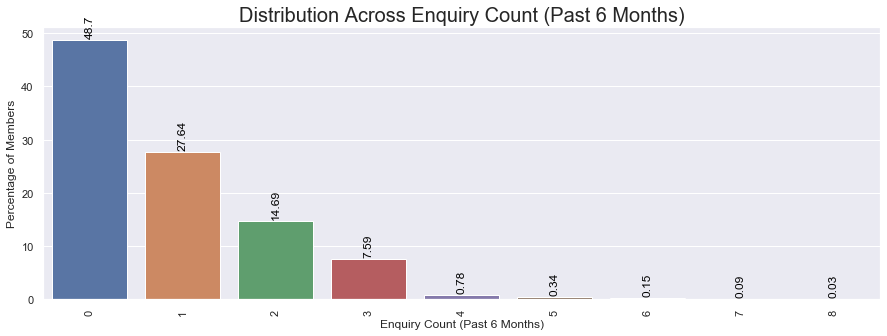

In [241]:
inq_last_6mths_dist = raw_data.inq_last_6mths.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=inq_last_6mths_dist.index, y=inq_last_6mths_dist.values)
plt.title('Distribution Across Enquiry Count (Past 6 Months)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = inq_last_6mths_dist.max() * 0.015
for index, value in enumerate(inq_last_6mths_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Enquiry Count (Past 6 Months)")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Inquiries Count (In Last 6 Months), categorical ordinal variable, categorised in year from 1-8.**
- Maximum applicants, around 48%, do not have any inquiry count.

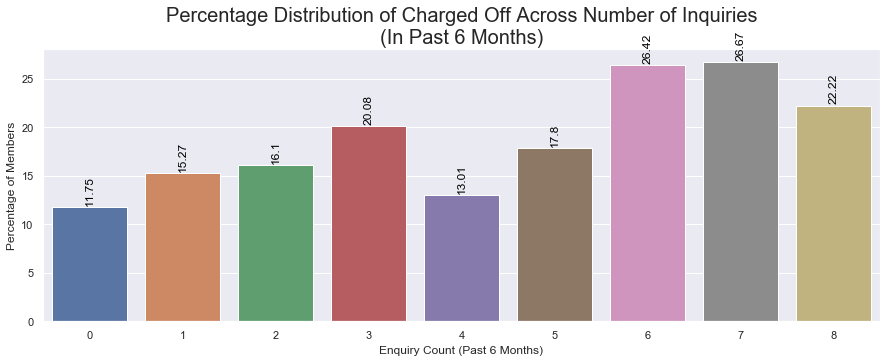

In [242]:
enq_count_df = raw_data.pivot_table(index='inq_last_6mths', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
enq_count_df['total'] = enq_count_df.sum(axis=1)
enq_count_df = enq_count_df.iloc[:,:-1].div(enq_count_df["total"], axis=0)*100
chart = sns.barplot(x = enq_count_df['Charged Off'].index, y=enq_count_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = enq_count_df['Charged Off'].max() * 0.015
for index, value in enumerate(enq_count_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Enquiry Count (Past 6 Months)")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Number of Inquiries\n(In Past 6 Months)", fontdict={'fontsize': 20})
plt.show()
# enq_count_df

**Observation**
- We see that, as the enquiry count increases, proportion of members getting default also increases.

In [243]:
##--
enq_count_df_x_index_list = [*range(1, enq_count_df.shape[0]+1, 1)] 
enq_count_df['enq_count_dfcorrelation_x_index'] =enq_count_df_x_index_list
enq_count_df

loan_status     Charged Off  Fully Paid  enq_count_dfcorrelation_x_index
inq_last_6mths                                                          
0                 11.747630   88.252370                                1
1                 15.271399   84.728601                                2
2                 16.100530   83.899470                                3
3                 20.076046   79.923954                                4
4                 13.011152   86.988848                                5
5                 17.796610   82.203390                                6
6                 26.415094   73.584906                                7
7                 26.666667   73.333333                                8
8                 22.222222   77.777778                                9

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


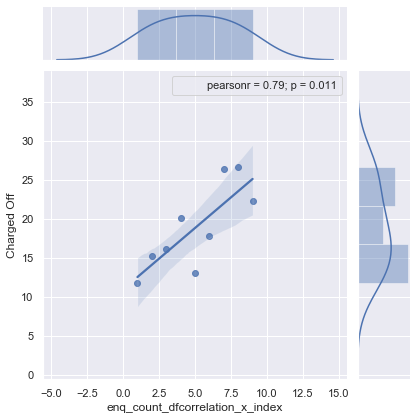

In [244]:
##--
enq_count_df_plot = sns.jointplot('enq_count_dfcorrelation_x_index', 'Charged Off',enq_count_df,kind="reg")
enq_count_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Inquiries Count (In Last 6 Months) and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.79, meaning as Inquiries Count (In Last 6 Months) will increase percentage charged off cases in bin.

### 3.21 Analysis of "Number of Credit Lines Available" column

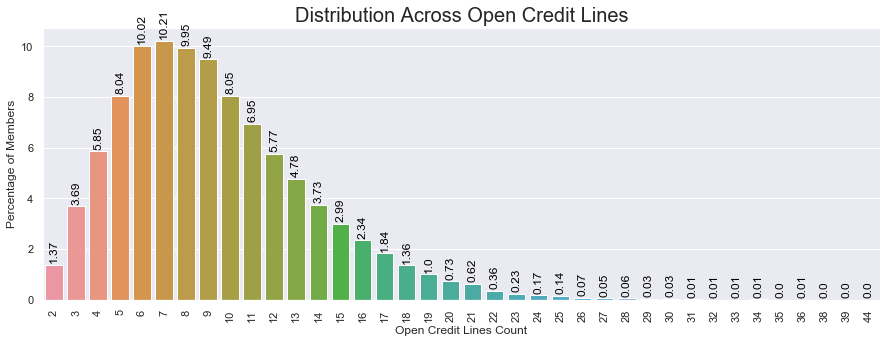

In [245]:
open_acc_dist = raw_data.groupby(by='open_acc').open_acc.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=open_acc_dist.index, y=open_acc_dist.values)
plt.title('Distribution Across Open Credit Lines', fontdict={'fontsize': 20})
label_deviation_above_y_axis = open_acc_dist.max() * 0.015
for index, value in enumerate(open_acc_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Open Credit Lines Count")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Number of Credit Lines Available, categorical ordinal variable, categorised from 2-44.**
- Maximum applicants, around 10.21%, have 7 credit lines available.

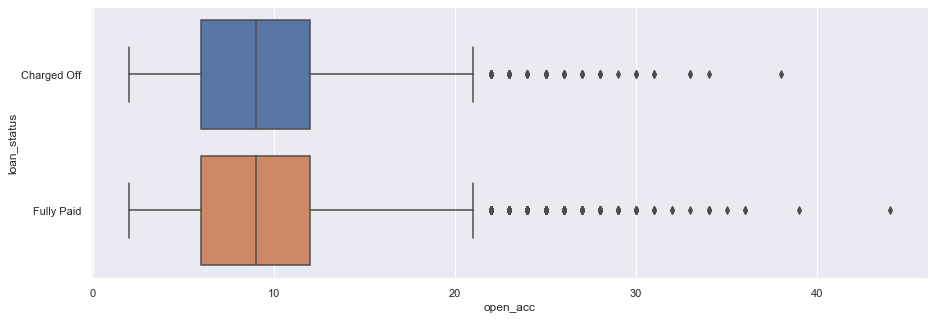

In [246]:
sns.boxplot(x=raw_data['open_acc'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [247]:
raw_data.groupby('loan_status')['open_acc'].describe()

count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   4874.0  9.281288  4.479778  2.0  6.0  9.0  12.0  38.0
Fully Paid   29788.0  9.291527  4.336627  2.0  6.0  9.0  12.0  44.0

**Observation**
- There almost no difference in mean and median values for charged off and fully paid category, so this variable will not have significant effec on making decision for default cases.

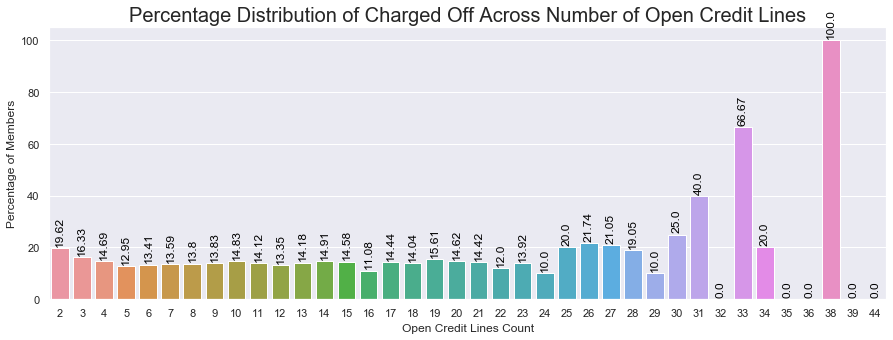

In [248]:
open_acc_df = raw_data.pivot_table(index='open_acc', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
open_acc_df['total'] = open_acc_df.sum(axis=1)
open_acc_df = open_acc_df.iloc[:,:-1].div(open_acc_df["total"], axis=0)*100
chart = sns.barplot(x = open_acc_df['Charged Off'].index, y=open_acc_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = open_acc_df['Charged Off'].max() * 0.015
for index, value in enumerate(open_acc_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Open Credit Lines Count")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Number of Open Credit Lines", fontdict={'fontsize': 20})
plt.show()
# open_acc_df

##--
**Observations**
- There is no clear treand available, however for open credit count 33 and 38 the percentage default cases increases significantly, 66.67 and 100% charged off cases respectivly.

In [249]:
##--
open_acc_df_x_index_list = [*range(1, open_acc_df.shape[0]+1, 1)] 
open_acc_df['open_acc_dfcorrelation_x_index'] =open_acc_df_x_index_list
open_acc_df

loan_status  Charged Off  Fully Paid  open_acc_dfcorrelation_x_index
open_acc                                                            
2              19.620253   80.379747                               1
3              16.328125   83.671875                               2
4              14.687038   85.312962                               3
5              12.952996   87.047004                               4
6              13.413932   86.586068                               5
7              13.587571   86.412429                               6
8              13.801102   86.198898                               7
9              13.833992   86.166008                               8
10             14.828080   85.171920                               9
11             14.119601   85.880399                              10
12             13.350000   86.650000                              11
13             14.182257   85.817743                              12
14             14.914992   85.085008                              13
15             14.575290   85.424710                              14
16             11.083744   88.916256                              15
17             14.442700   85.557300                              16
18             14.042553   85.957447                              17
19             15.606936   84.393064                              18
20             14.624506   85.375494                              19
21             14.418605   85.581395                              20
22             12.000000   88.000000                              21
23             13.924051   86.075949                              22
24             10.000000   90.000000                              23
25             20.000000   80.000000                              24
26             21.739130   78.260870                              25
27             21.052632   78.947368                              26
28             19.047619   80.952381                              27
29             10.000000   90.000000                              28
30             25.000000   75.000000                              29
31             40.000000   60.000000                              30
32              0.000000  100.000000                              31
33             66.666667   33.333333                              32
34             20.000000   80.000000                              33
35              0.000000  100.000000                              34
36              0.000000  100.000000                              35
38            100.000000    0.000000                              36
39              0.000000  100.000000                              37
44              0.000000  100.000000                              38

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


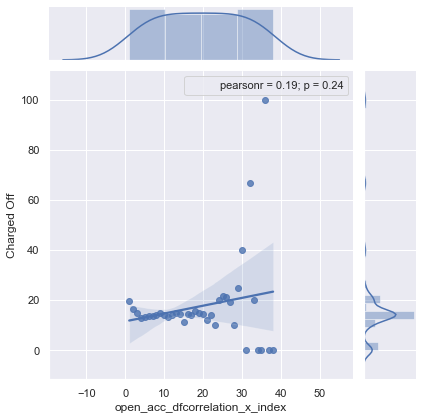

In [250]:
##--
open_acc_df_plot = sns.jointplot('open_acc_dfcorrelation_x_index', 'Charged Off',open_acc_df,kind="reg")
open_acc_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Number of Credit Lines Available and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.19, meaning as Number of Credit Lines Available will increase percentage charged off cases in bin. However the correlation is not strong enough

### 3.22 Analysis of "Derogatory Public Records" column

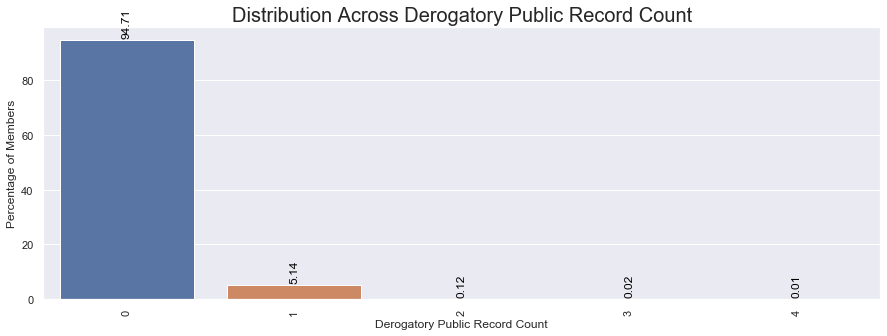

In [251]:
pub_rec_dist = raw_data.pub_rec.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=pub_rec_dist.index, y=pub_rec_dist.values)
plt.title('Distribution Across Derogatory Public Record Count', fontdict={'fontsize': 20})
label_deviation_above_y_axis = pub_rec_dist.max() * 0.015
for index, value in enumerate(pub_rec_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Derogatory Public Record Count")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Derogatory Public Records, categorical ordinal variable, categorised in 0,1,2.3,4.**
- Maximum applicants, around 94.71%, have no Derogatory Public Records.

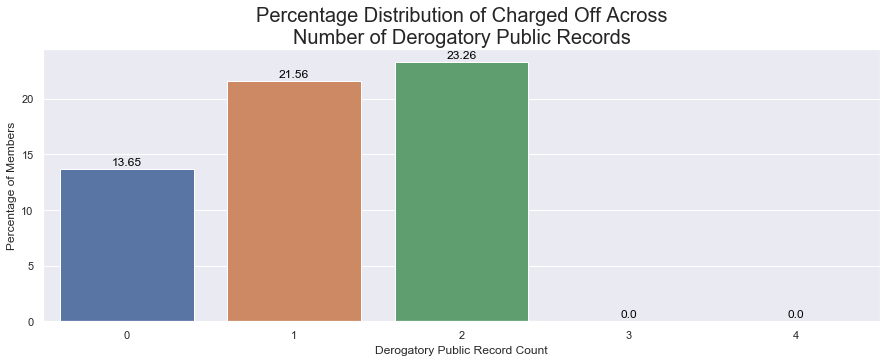

In [252]:
pub_rec_df = raw_data.pivot_table(index='pub_rec', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
pub_rec_df['total'] = pub_rec_df.sum(axis=1)
pub_rec_df = pub_rec_df.iloc[:,:-1].div(pub_rec_df["total"], axis=0)*100
chart = sns.barplot(x = pub_rec_df['Charged Off'].index, y=pub_rec_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = pub_rec_df['Charged Off'].max() * 0.015
for index, value in enumerate(pub_rec_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Derogatory Public Record Count")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across\nNumber of Derogatory Public Records", fontdict={'fontsize': 20})
plt.show()
# pub_rec_df

**Observation**
- We see that, as the Derogatory Public Records increases, proportion of members getting default decreases.
- With exception at record count 3 and 4, because available applications in the category are not significant.

In [253]:
##--
pub_rec_df_x_index_list = [*range(1, pub_rec_df.shape[0]+1, 1)] 
pub_rec_df['pub_rec_dfcorrelation_x_index'] =pub_rec_df_x_index_list
pub_rec_df

loan_status  Charged Off  Fully Paid  pub_rec_dfcorrelation_x_index
pub_rec                                                            
0              13.646055   86.353945                              1
1              21.560921   78.439079                              2
2              23.255814   76.744186                              3
3               0.000000  100.000000                              4
4               0.000000  100.000000                              5

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


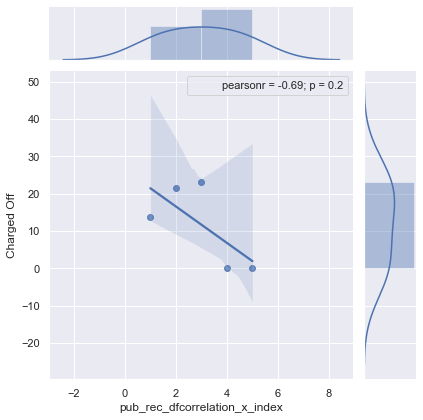

In [254]:
##--
pub_rec_df_plot = sns.jointplot('pub_rec_dfcorrelation_x_index', 'Charged Off',pub_rec_df,kind="reg")
pub_rec_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- This is not in line with the bar chart shows.
- We need to ommit the point which have percentage of memeber is zero. We can do this as population distribution also is minimal.

In [255]:
pub_rec_df = pub_rec_df[pub_rec_df['Fully Paid'] != 100.0]
pub_rec_df_x_index_list = [*range(1, pub_rec_df.shape[0]+1, 1)] 
pub_rec_df['pub_rec_dfcorrelation_x_index'] =pub_rec_df_x_index_list
pub_rec_df

C:\Users\TOSHIBA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


loan_status  Charged Off  Fully Paid  pub_rec_dfcorrelation_x_index
pub_rec                                                            
0              13.646055   86.353945                              1
1              21.560921   78.439079                              2
2              23.255814   76.744186                              3

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


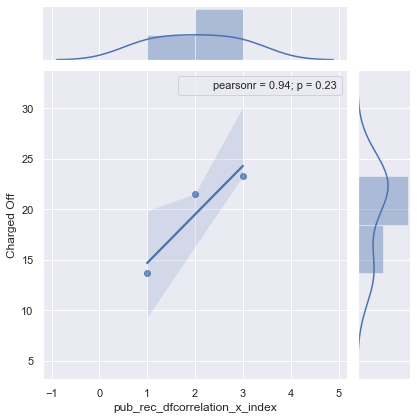

In [256]:
##--
pub_rec_df_plot = sns.jointplot('pub_rec_dfcorrelation_x_index', 'Charged Off',pub_rec_df,kind="reg")
pub_rec_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Derogatory Public Records and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.94, meaning as Derogatory Public Records will increase percentage charged off cases in bin.

### 3.23 Analysis of "Revolving Balance" column

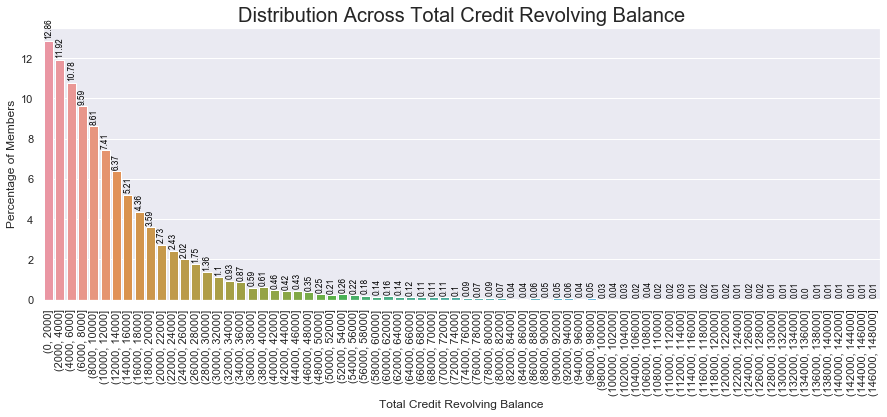

In [257]:
revol_bal_category_dist = raw_data.revol_bal_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=revol_bal_category_dist.index, y=revol_bal_category_dist.values)
plt.title('Distribution Across Total Credit Revolving Balance', fontdict={'fontsize': 20})
label_deviation_above_y_axis = revol_bal_category_dist.max() * 0.015
for index, value in enumerate(revol_bal_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical', fontsize='x-small')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Total Credit Revolving Balance")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Revolving Balance, categorical ordinal variable, categorised in bins of 2000.**
- Maximum applicants, around 12.86%, are in 0-2000 bin.

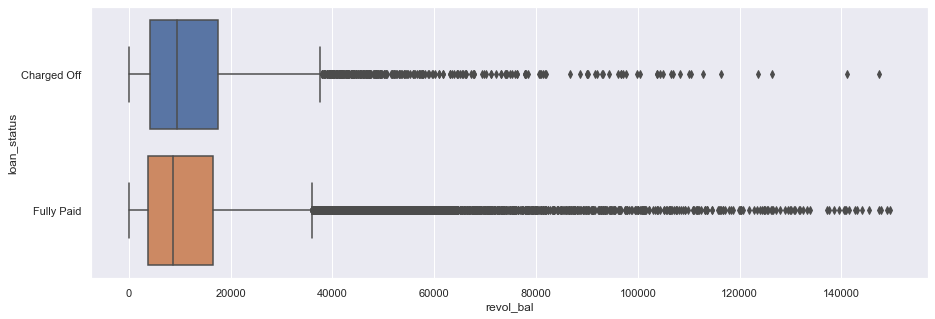

In [258]:
sns.boxplot(x=raw_data['revol_bal'], y=raw_data['loan_status'], data=raw_data)
plt.show()

**Observation**
- There is no large difference in Charged off and Fully paid distribution, this column will not have any significant impact on descision.

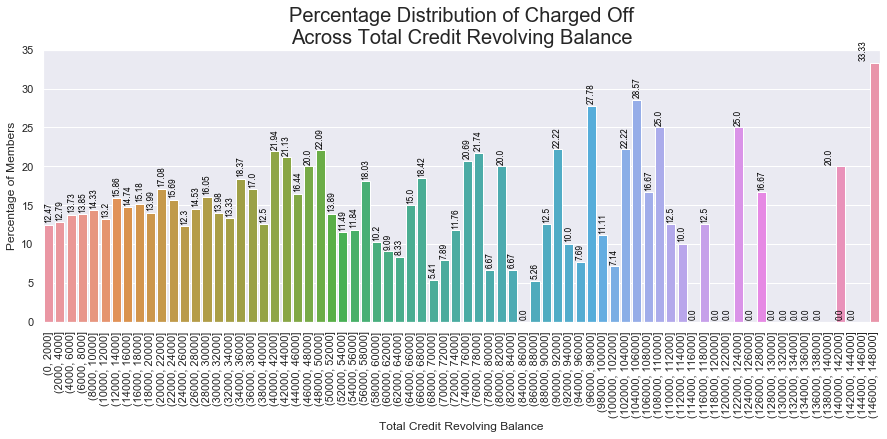

In [259]:
revol_bal_df = raw_data.pivot_table(index='revol_bal_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_bal_df['total'] = revol_bal_df.sum(axis=1)
revol_bal_df = revol_bal_df.iloc[:,:-1].div(revol_bal_df["total"], axis=0)*100
chart = sns.barplot(x = revol_bal_df['Charged Off'].index, y=revol_bal_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

label_deviation_above_y_axis = revol_bal_df['Charged Off'].max() * 0.015
for index, value in enumerate(revol_bal_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical', fontsize='x-small')
plt.xlabel("Total Credit Revolving Balance")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off\nAcross Total Credit Revolving Balance", fontdict={'fontsize': 20})
plt.show()
# revol_bal_df

**Observation**
- We see that, as the Revolving Balance increases, proportion of members getting default also increases.

In [260]:
##--
#dropping all the zero value as population distribution for later part is significantly low
revol_bal_df = revol_bal_df[revol_bal_df['Charged Off'] >0]
revol_bal_df

loan_status         Charged Off  Fully Paid
revol_bal_category                         
(0, 2000]             12.465565   87.534435
(2000, 4000]          12.788104   87.211896
(4000, 6000]          13.729789   86.270211
(6000, 8000]          13.850416   86.149584
(8000, 10000]         14.329791   85.670209
(10000, 12000]        13.197767   86.802233
(12000, 14000]        15.862709   84.137291
(14000, 16000]        14.739229   85.260771
(16000, 18000]        15.176152   84.823848
(18000, 20000]        13.991770   86.008230
(20000, 22000]        17.081081   82.918919
(22000, 24000]        15.693431   84.306569
(24000, 26000]        12.298682   87.701318
(26000, 28000]        14.527027   85.472973
(28000, 30000]        16.052061   83.947939
(30000, 32000]        13.978495   86.021505
(32000, 34000]        13.333333   86.666667
(34000, 36000]        18.367347   81.632653
(36000, 38000]        17.000000   83.000000
(38000, 40000]        12.500000   87.500000
(40000, 42000]        21.935484   78.064516
(42000, 44000]        21.126761   78.873239
(44000, 46000]        16.438356   83.561644
(46000, 48000]        20.000000   80.000000
(48000, 50000]        22.093023   77.906977
(50000, 52000]        13.888889   86.111111
(52000, 54000]        11.494253   88.505747
(54000, 56000]        11.842105   88.157895
(56000, 58000]        18.032787   81.967213
(58000, 60000]        10.204082   89.795918
(60000, 62000]         9.090909   90.909091
(62000, 64000]         8.333333   91.666667
(64000, 66000]        15.000000   85.000000
(66000, 68000]        18.421053   81.578947
(68000, 70000]         5.405405   94.594595
(70000, 72000]         7.894737   92.105263
(72000, 74000]        11.764706   88.235294
(74000, 76000]        20.689655   79.310345
(76000, 78000]        21.739130   78.260870
(78000, 80000]         6.666667   93.333333
(80000, 82000]        20.000000   80.000000
(82000, 84000]         6.666667   93.333333
(86000, 88000]         5.263158   94.736842
(88000, 90000]        12.500000   87.500000
(90000, 92000]        22.222222   77.777778
(92000, 94000]        10.000000   90.000000
(94000, 96000]         7.692308   92.307692
(96000, 98000]        27.777778   72.222222
(98000, 100000]       11.111111   88.888889
(100000, 102000]       7.142857   92.857143
(102000, 104000]      22.222222   77.777778
(104000, 106000]      28.571429   71.428571
(106000, 108000]      16.666667   83.333333
(108000, 110000]      25.000000   75.000000
(110000, 112000]      12.500000   87.500000
(112000, 114000]      10.000000   90.000000
(116000, 118000]      12.500000   87.500000
(122000, 124000]      25.000000   75.000000
(126000, 128000]      16.666667   83.333333
(140000, 142000]      20.000000   80.000000
(146000, 148000]      33.333333   66.666667

In [261]:
##--
revol_bal_df_x_index_list = [*range(1, revol_bal_df.shape[0]+1, 1)] 
revol_bal_df['revol_bal_dfcorrelation_x_index'] =revol_bal_df_x_index_list
revol_bal_df

loan_status         Charged Off  Fully Paid  revol_bal_dfcorrelation_x_index
revol_bal_category                                                          
(0, 2000]             12.465565   87.534435                                1
(2000, 4000]          12.788104   87.211896                                2
(4000, 6000]          13.729789   86.270211                                3
(6000, 8000]          13.850416   86.149584                                4
(8000, 10000]         14.329791   85.670209                                5
(10000, 12000]        13.197767   86.802233                                6
(12000, 14000]        15.862709   84.137291                                7
(14000, 16000]        14.739229   85.260771                                8
(16000, 18000]        15.176152   84.823848                                9
(18000, 20000]        13.991770   86.008230                               10
(20000, 22000]        17.081081   82.918919                               11
(22000, 24000]        15.693431   84.306569                               12
(24000, 26000]        12.298682   87.701318                               13
(26000, 28000]        14.527027   85.472973                               14
(28000, 30000]        16.052061   83.947939                               15
(30000, 32000]        13.978495   86.021505                               16
(32000, 34000]        13.333333   86.666667                               17
(34000, 36000]        18.367347   81.632653                               18
(36000, 38000]        17.000000   83.000000                               19
(38000, 40000]        12.500000   87.500000                               20
(40000, 42000]        21.935484   78.064516                               21
(42000, 44000]        21.126761   78.873239                               22
(44000, 46000]        16.438356   83.561644                               23
(46000, 48000]        20.000000   80.000000                               24
(48000, 50000]        22.093023   77.906977                               25
(50000, 52000]        13.888889   86.111111                               26
(52000, 54000]        11.494253   88.505747                               27
(54000, 56000]        11.842105   88.157895                               28
(56000, 58000]        18.032787   81.967213                               29
(58000, 60000]        10.204082   89.795918                               30
(60000, 62000]         9.090909   90.909091                               31
(62000, 64000]         8.333333   91.666667                               32
(64000, 66000]        15.000000   85.000000                               33
(66000, 68000]        18.421053   81.578947                               34
(68000, 70000]         5.405405   94.594595                               35
(70000, 72000]         7.894737   92.105263                               36
(72000, 74000]        11.764706   88.235294                               37
(74000, 76000]        20.689655   79.310345                               38
(76000, 78000]        21.739130   78.260870                               39
(78000, 80000]         6.666667   93.333333                               40
(80000, 82000]        20.000000   80.000000                               41
(82000, 84000]         6.666667   93.333333                               42
(86000, 88000]         5.263158   94.736842                               43
(88000, 90000]        12.500000   87.500000                               44
(90000, 92000]        22.222222   77.777778                               45
(92000, 94000]        10.000000   90.000000                               46
(94000, 96000]         7.692308   92.307692                               47
(96000, 98000]        27.777778   72.222222                               48
(98000, 100000]       11.111111   88.888889                               49
(100000, 102000]       7.142857   92.857143                              

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


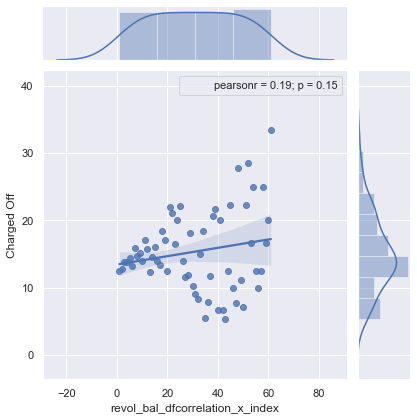

In [262]:
##--
revol_bal_df_plot = sns.jointplot('revol_bal_dfcorrelation_x_index', 'Charged Off',revol_bal_df,kind="reg")
revol_bal_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Revolving Balance and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.19, meaning as Revolving Balance will increase percentage charged off cases in bin. However correlation is weak.

### 3.24 Analysis of "Revolving Utilization Rate" column

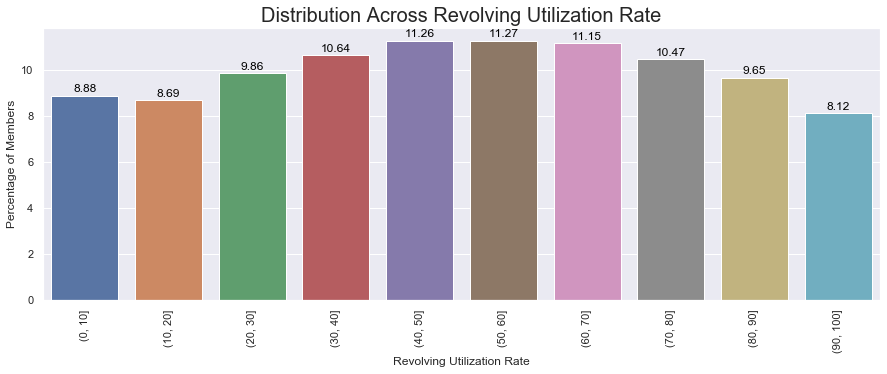

In [263]:
revol_util_category_dist = raw_data.revol_util_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=revol_util_category_dist.index, y=revol_util_category_dist.values)
plt.title('Distribution Across Revolving Utilization Rate', fontdict={'fontsize': 20})
label_deviation_above_y_axis = revol_util_category_dist.max() * 0.015
for index, value in enumerate(revol_util_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Revolving Utilization Rate")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Revolving Utilization Rate, categorical ordinal variable, categorised in bins of 10.**
- Maximum applicants, around 11.27%, are in 50-60 bin.

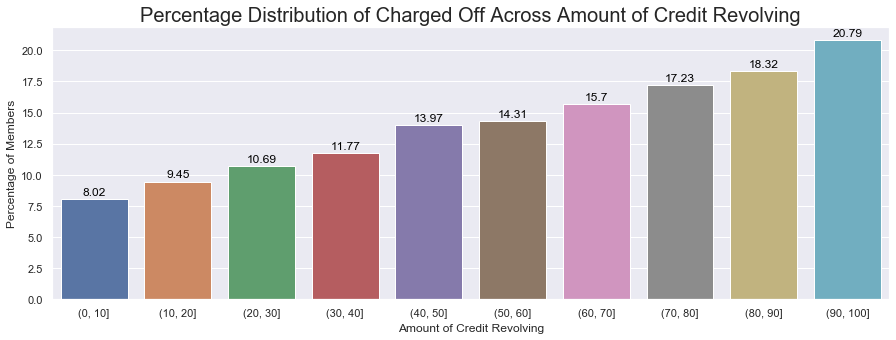

In [264]:
revol_util_df = raw_data.pivot_table(index='revol_util_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_util_df['total'] = revol_util_df.sum(axis=1)
revol_util_df = revol_util_df.iloc[:,:-1].div(revol_util_df["total"], axis=0)*100
chart = sns.barplot(x = revol_util_df['Charged Off'].index, y=revol_util_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = revol_util_df['Charged Off'].max() * 0.015
for index, value in enumerate(revol_util_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Amount of Credit Revolving")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Amount of Credit Revolving", fontdict={'fontsize': 20})
plt.show()
# revol_util_df

**Observation**
- We see that, as the Revolving Balance increases, proportion of members getting default also increases.

In [265]:
##--
revol_util_df_x_index_list = [*range(1, revol_util_df.shape[0]+1, 1)] 
revol_util_df['revol_util_dfcorrelation_x_index'] =revol_util_df_x_index_list
revol_util_df

loan_status          Charged Off  Fully Paid  revol_util_dfcorrelation_x_index
revol_util_category                                                           
(0, 10]                 8.017299   91.982701                                 1
(10, 20]                9.452567   90.547433                                 2
(20, 30]               10.691824   89.308176                                 3
(30, 40]               11.771238   88.228762                                 4
(40, 50]               13.974830   86.025170                                 5
(50, 60]               14.308176   85.691824                                 6
(60, 70]               15.704449   84.295551                                 7
(70, 80]               17.230682   82.769318                                 8
(80, 90]               18.323646   81.676354                                 9
(90, 100]              20.792439   79.207561                                10

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


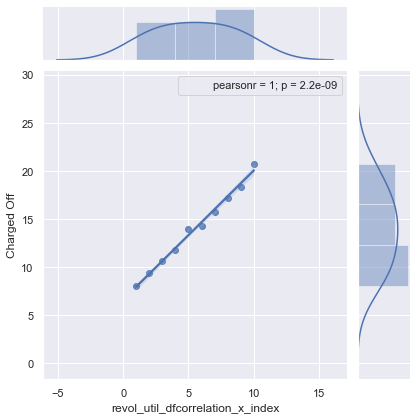

In [266]:
##--
revol_util_df_plot = sns.jointplot('revol_util_dfcorrelation_x_index', 'Charged Off',revol_util_df,kind="reg")
revol_util_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Revolving Utilization Rate and percentage charged off increase in bin.
- Overall trend is positive, with coefficient 1, meaning as Revolving Utilization Rate will increase percentage charged off cases in bin.

### 3.25 Analysis of "Total Credit Lines" column

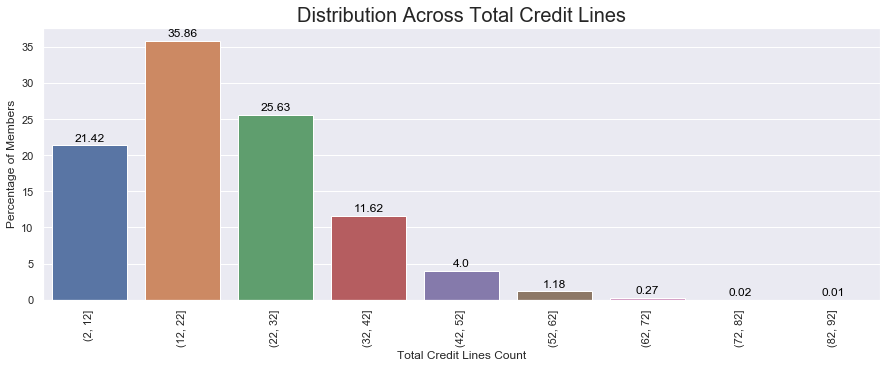

In [267]:
total_acc_category_dist = raw_data.total_acc_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=total_acc_category_dist.index, y=total_acc_category_dist.values)
plt.title('Distribution Across Total Credit Lines', fontdict={'fontsize': 20})
label_deviation_above_y_axis = total_acc_category_dist.max() * 0.015
for index, value in enumerate(total_acc_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Total Credit Lines Count")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Total Credit Lines, categorical ordinal variable, categorised in bins of 10.**
- Maximum applicants, around 35.86%, are in 12-22 bin.

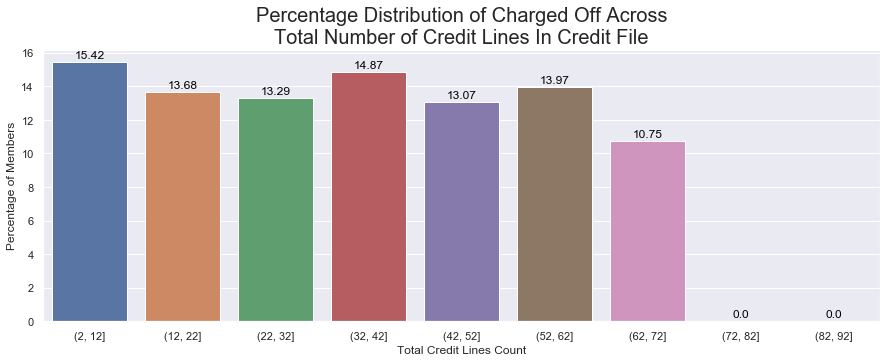

In [268]:
total_acc_df = raw_data.pivot_table(index='total_acc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
total_acc_df['total'] = total_acc_df.sum(axis=1)
total_acc_df = total_acc_df.iloc[:,:-1].div(total_acc_df["total"], axis=0)*100
chart = sns.barplot(x = total_acc_df['Charged Off'].index, y=total_acc_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = total_acc_df['Charged Off'].max() * 0.015
for index, value in enumerate(total_acc_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Total Credit Lines Count")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across\nTotal Number of Credit Lines In Credit File", fontdict={'fontsize': 20})
plt.show()
# total_acc_df

**Observation**
- We see that, as the Total Credit Line increases, proportion of members getting default decreases.
- For bin (72,82] and (82,92] available applications in the category are not significant.

In [269]:
# we will drop the zero percenage of charged off as for the same columns population distribution is low.
total_acc_df = total_acc_df[total_acc_df['Charged Off'] > 0]

In [270]:
##--
total_acc_df_x_index_list = [*range(1,total_acc_df.shape[0]+1, 1)] 
total_acc_df['total_acc_dfcorrelation_x_index'] =total_acc_df_x_index_list
total_acc_df

loan_status         Charged Off  Fully Paid  total_acc_dfcorrelation_x_index
total_acc_category                                                          
(2, 12]               15.422953   84.577047                                1
(12, 22]              13.676589   86.323411                                2
(22, 32]              13.293561   86.706439                                3
(32, 42]              14.867213   85.132787                                4
(42, 52]              13.068592   86.931408                                5
(52, 62]              13.970588   86.029412                                6
(62, 72]              10.752688   89.247312                                7

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


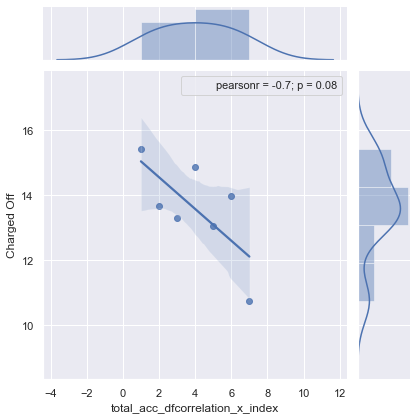

In [271]:
##--
total_acc_df_plot = sns.jointplot('total_acc_dfcorrelation_x_index', 'Charged Off',total_acc_df,kind="reg")
total_acc_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Total Credit Lines and percentage charged off increase in bin.
- Overall trend is negative, with coefficient of -0.70, meaning as Total Credit Lines will decrease percentage charged off cases in bin.

### 3.26 Analysis of "Remaining Oustanding Principal" column

In [272]:
raw_data.out_prncp_category.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: out_prncp_category, dtype: object

#### Remaining Outstanding Principal Column contains no value after removing rows coresponding to loan_status column which are marked as "Current"

### 3.27 Analysis of "Remaining Oustanding Principal (Of Total Amount Funded by Investors)" column

In [273]:
raw_data.out_prncp_inv_category.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: out_prncp_inv_category, dtype: object

#### Remaining Oustanding Principal (Of Total Amount Funded by Investors) contains no value after removing rows coresponding to loan_status column which are marked as "Current"

### 3.28 Analysis of "Number of Public Record Bankruptcies" column

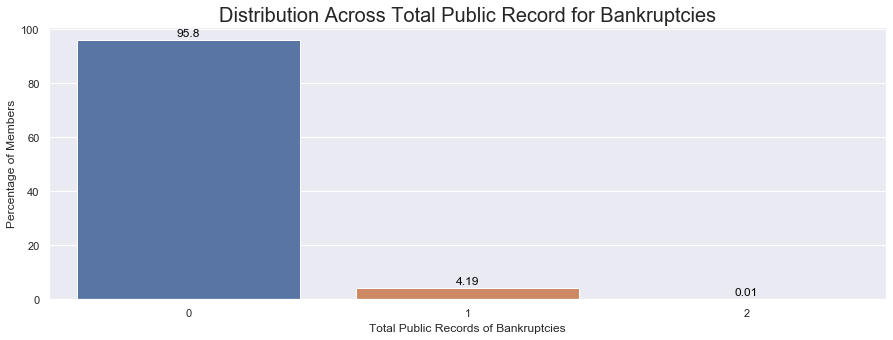

In [274]:
pub_rec_bankruptcies_dist = raw_data.pub_rec_bankruptcies.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=pub_rec_bankruptcies_dist.index, y=pub_rec_bankruptcies_dist.values)
plt.title('Distribution Across Total Public Record for Bankruptcies', fontdict={'fontsize': 20})
label_deviation_above_y_axis = pub_rec_bankruptcies_dist.max() * 0.015
for index, value in enumerate(pub_rec_bankruptcies_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Total Public Records of Bankruptcies")
plt.ylabel("Percentage of Members")
plt.show()

##--
**Observations**
- **Number of Public Record Bankruptcies, categorical ordinal variable, categorised in bins of 10.**
- Maximum applicants, around 95.80%, have no record of public bankruptcies.

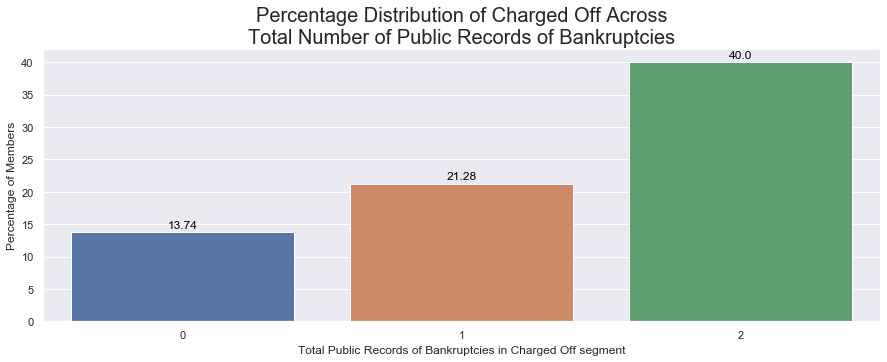

In [275]:
pub_rec_bankruptcies_df = raw_data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
pub_rec_bankruptcies_df['total'] = pub_rec_bankruptcies_df.sum(axis=1)
pub_rec_bankruptcies_df = pub_rec_bankruptcies_df.iloc[:,:-1].div(pub_rec_bankruptcies_df["total"], axis=0)*100
chart = sns.barplot(x = pub_rec_bankruptcies_df['Charged Off'].index, y=pub_rec_bankruptcies_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = pub_rec_bankruptcies_df['Charged Off'].max() * 0.015
for index, value in enumerate(pub_rec_bankruptcies_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Total Public Records of Bankruptcies in Charged Off segment")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across\nTotal Number of Public Records of Bankruptcies", fontdict={'fontsize': 20})
plt.show()
# pub_rec_bankruptcies_df

**Observation**
- From Above bar chart it could be clearly infered that with increase in public bankruptcy records chaces of loan going for charged off increases.

In [276]:
##--
pub_rec_bankruptcies_df_x_index_list = [*range(1, pub_rec_bankruptcies_df.shape[0]+1, 1)] 
pub_rec_bankruptcies_df['pub_rec_bankruptcies_dfcorrelation_x_index'] =pub_rec_bankruptcies_df_x_index_list
pub_rec_bankruptcies_df

loan_status           Charged Off  Fully Paid  \
pub_rec_bankruptcies                            
0                       13.741906   86.258094   
1                       21.280992   78.719008   
2                       40.000000   60.000000   

loan_status           pub_rec_bankruptcies_dfcorrelation_x_index  
pub_rec_bankruptcies                                              
0                                                              1  
1                                                              2  
2                                                              3

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


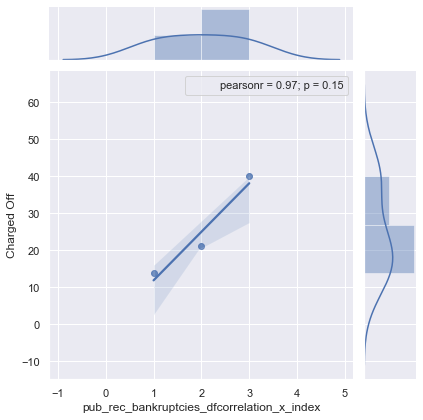

In [277]:
##--
pub_rec_bankruptcies_df_plot = sns.jointplot('pub_rec_bankruptcies_dfcorrelation_x_index', 'Charged Off',pub_rec_bankruptcies_df,kind="reg")
pub_rec_bankruptcies_df_plot.annotate(stats.pearsonr)
plt.show()

##--
**Observation**
- Treand line plotted along with intersection point could be used to extrapolate and approximate to intermediate or out of bound values.
- This trend line can also be viewed as relation between Number of Public Record Bankruptcies and percentage charged off increase in bin.
- Overall trend is positive, with coefficient of 0.97, meaning as Number of Public Record Bankruptcies will increase percentage charged off cases in bin.

# Bivariant analysis

In [278]:
raw_data.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
id                                                                            
1077430    1314167       2500         2500           2500.0    60     15.27   
1076863    1277178      10000        10000          10000.0    36     13.49   
1075269    1311441       5000         5000           5000.0    36      7.90   
1069639    1304742       7000         7000           7000.0    60     15.96   
1072053    1288686       3000         3000           3000.0    36     18.64   

         installment grade sub_grade                  emp_title  emp_length  \
id                                                                            
1077430        59.83     C        C4                      ryder         0.0   
1076863       339.31     C        C1        air resources board        10.0   
1075269       156.46     A        A4       veolia transportaton         3.0   
1069639       170.08     C        C5  southern star photography         8.0   
1072053       109.43     E        E1            mkc accounting          9.0   

        home_ownership  annual_inc verification_status    issue_d  \
id                                                                  
1077430           RENT     30000.0     Source Verified 2011-12-01   
1076863           RENT     49200.0     Source Verified 2011-12-01   
1075269           RENT     36000.0     Source Verified 2011-12-01   
1069639           RENT     47004.0        Not Verified 2011-12-01   
1072053           RENT     48000.0     Source Verified 2011-12-01   

         loan_status                                                url  \
id                                                                        
1077430  Charged Off  https://lendingclub.com/browse/loanDetail.acti...   
1076863   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1075269   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1069639   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1072053   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   

                    purpose                                  title zip_code  \
id                                                                            
1077430                 Car                                   bike    309xx   
1076863               Other                               personel    917xx   
1075269             Wedding  My wedding loan I promise to pay back    852xx   
1069639  Debt Consolidation                                   Loan    280xx   
1072053                 Car                        Car Downpayment    900xx   

        addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
id                                                                          
1077430         GA   1.00            0               5         3        0   
1076863         CA  20.00            0               1        10        0   
1075269         AZ  11.20            0               3         9        0   
1069639         NC  23.51            0               1         7        0   
1072053         CA   5.35            0               2         4        0   

         revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
id                                                                    
1077430       1687         9.4          4        0.0            0.0   
1076863       5598        21.0         37        0.0            0.0   
1075269       7963        28.3         12        0.0            0.0   
1069639      17726        85.6         11        0.0            0.0   
1072053       8221        87.5          4        0.0            0.0   

         pub_rec_bankruptcies funded_amount_category int_rate_category  \
id                                                                       
1077430                     0              (0, 5000]          (15, 16]   
1076863                     0          (5000, 10000]          (13, 14]   
107

In [279]:
##--
#list of contineous variables and there corelation with each other
contineous_Var = ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc',  'pub_rec_bankruptcies']
contineous_Var

['loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

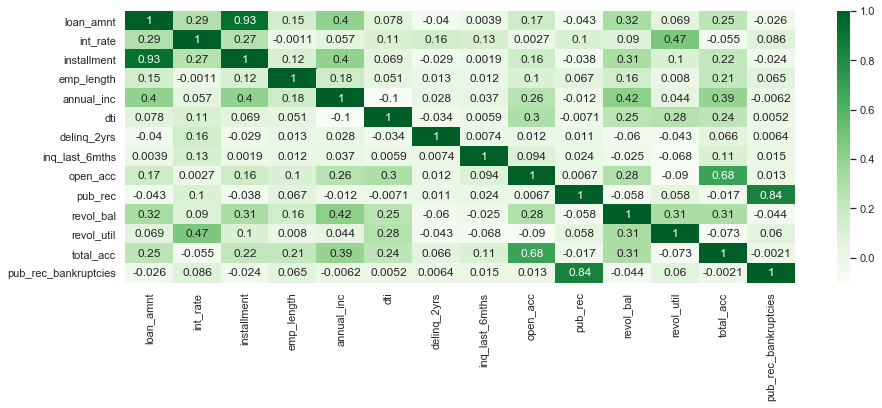

In [280]:
corr = raw_data[contineous_Var].corr()
sns.heatmap(corr, annot=True, center=0.5,cmap = "Greens")

##--
**Observations**
- Interest rate and revol_util has higest correlation, interest rate is increasing with revol_util, impling bank is charging higher interest for reisky loan application.
- loan_amnt and installment has very high correlation, impling the installment will be higher for high loan amount.
- Annual income has good positive corelation with revol_bal and total_acc, impling more the income eligible and capable for more credit lines.

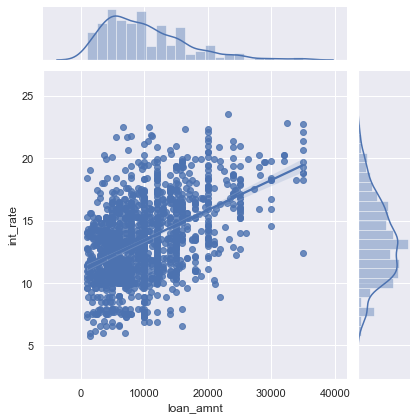

In [281]:
sns.jointplot('loan_amnt', 'int_rate', raw_data.loc[raw_data.pub_rec_bankruptcies > 0],kind="reg")

##--
**Observation**
- From above joint plot it is evident that higher loan amount higher is interest rate charged by bank.